<div style="border:solid blue 3px; padding: 20px">

**Привет, Александр!** 👋

Меня зовут Алексей Манелюк, я буду проверять твой проект. Предлагаю общаться на "ты" 😉, но если неудобно - скажи и будем на "вы".

Моя цель - не указать на совершенные тобой ошибки, а поделиться своим опытом и помочь тебе сделать крутой проект, который не стыдно будет положить в твое портфолио.

В тексте проекта ты увидишь мои комментарии, пожалуйста, не удаляй, не перемещай и не изменяй их. У комментариев могут быть приписки **V2**, **V3** и т.д., которые соответствуют версии проверки. Я буду использовать цветовую разметку:
<p>
<div class="alert-danger">
<b>Комментарий ревьюера ❌</b>

Так выделены самые важные замечания. Без их отработки я не смогу принять проект. </div>

<div class="alert-warning">
<b>Комментарий ревьюера ⚠️</b>

Так выделены небольшие замечания или полезные советы. Постарайся учесть их.</div>
<p>
<div class="alert-success">
<b>Комментарий ревьюера ✔️</b>

Так выделены правильные решения.</div>

Предлагаю работать в диалоге: если что-то дорабатываешь или отвечаешь на мой комментарий - пиши об этом. Мне будет удобней, если ты выделишь свои комментарии:
<p>
<div class="alert-info">
<b>Комментарий студента</b>

Например, так.</div>

Все это поможет мне быстрее принять твой проект.</div>

<div class="alert-warning">
<b>Комментарий ревьюера ⚠️</b>

📌 Целесообразно дать проекту название, после названия, обязательно нужно добавлять бриф, цели исследования, описание данных и план работы.</div>

# Как продаются квартиры

В данном проекте будет рассмотрена зависимость стоимости квартир от различных параметров. Таких как месторасположение, площадь, удаление от географических объектов и т.д.

В начале будет произведен обзор жанных и будут намечены цели для предобработки данных. На втром этапе будет произведена обработка данных, в том числе: заполнение пропусков, устранение дубликатов, приведение типов, усранение явных ошибок в данных. 
Делее будет выполнена обработка данных. Н аэтом этапев данные будут добавлены необходимые столбцы. 
После выполнения всех предварительных этапов будет произведено исследование в ходе которого будет изучено, зависит ли цена от:
- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).






## Импорт и обзор данных

In [1]:
#импорт библиотек
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rcParams
import seaborn as sns

In [2]:
#сохраняем датасет в переменную data
try:
    data = pd.read_csv('real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

In [3]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
#описание данных
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


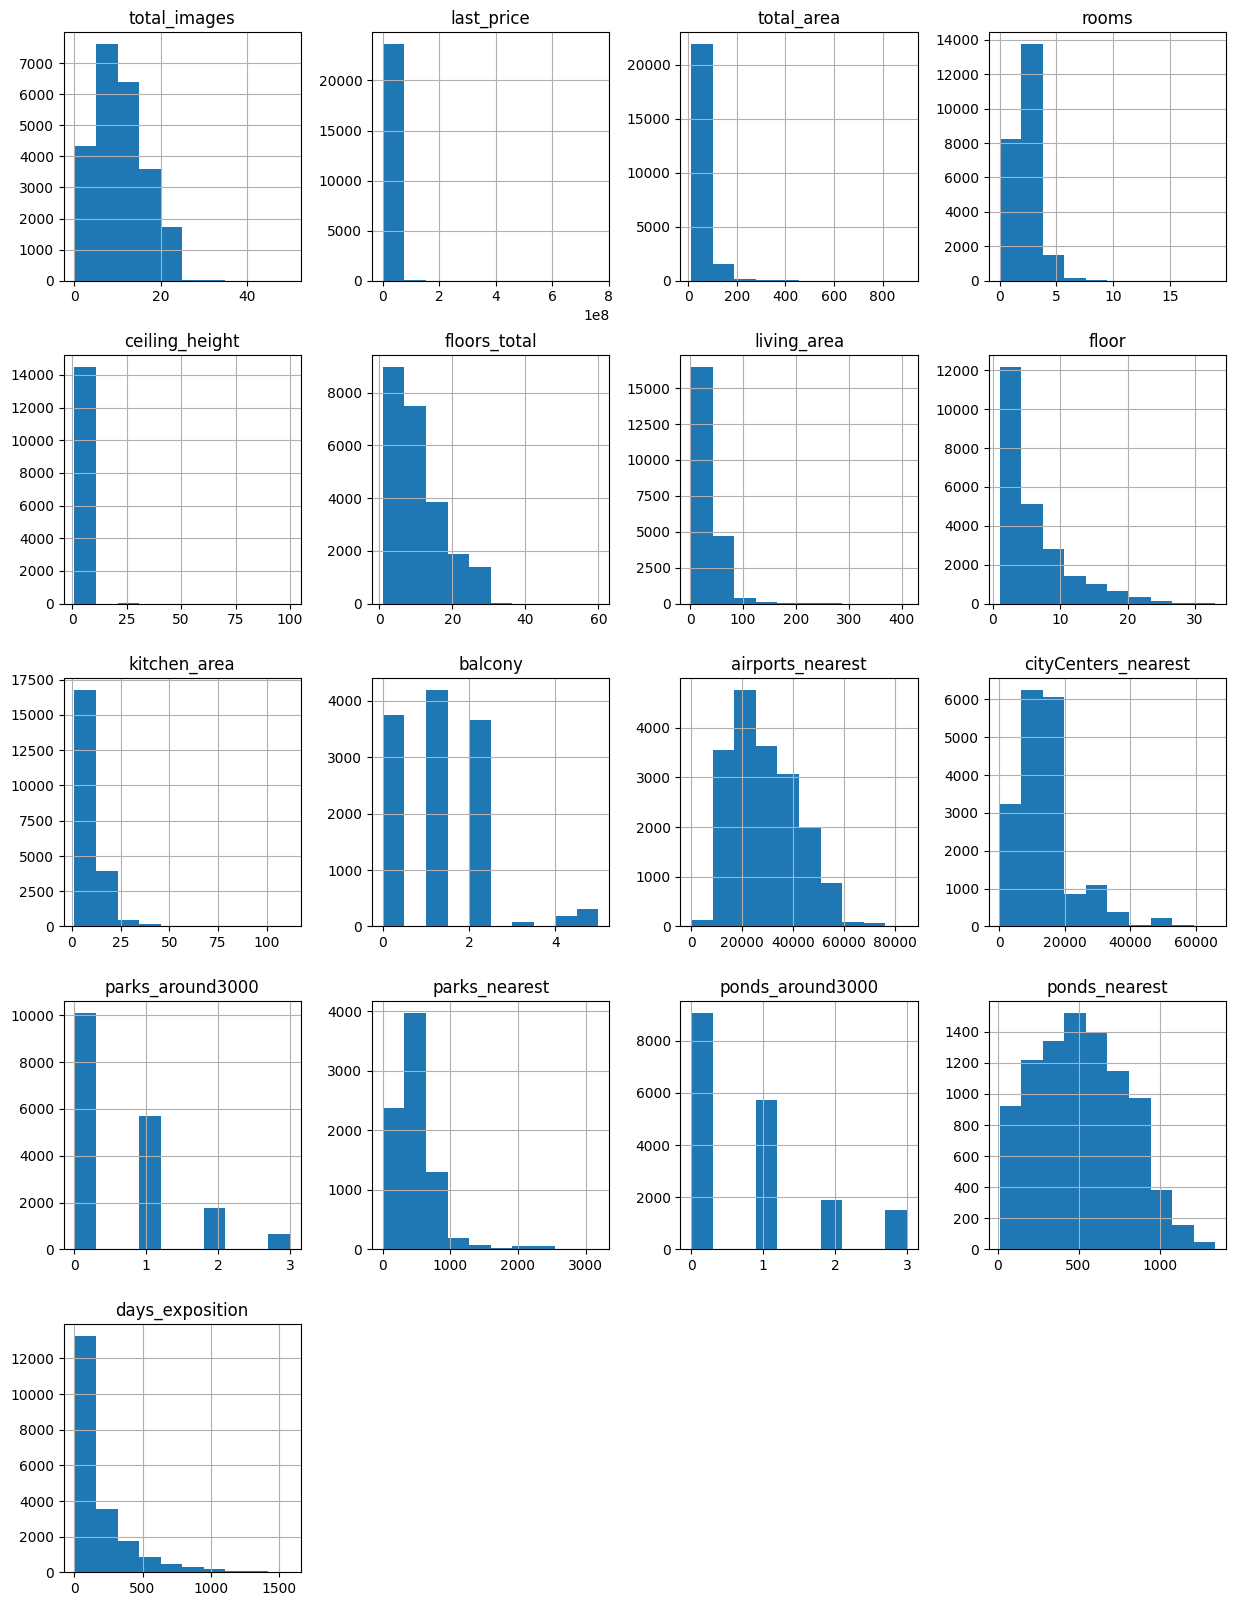

In [6]:
data.hist(figsize=(15, 20));

# Выводы по обзору данных

Неполные данные в столбцах: ceiling_height; floors_total; living_area; is_apartment; kitchen_area; balcony; locality_name; airports_nearest; cityCenters_nearest; parks_around3000; parks_nearest; ponds_around3000; ponds_nearest; days_exposition. 


Неверный тип данных в столбце: is_apartment.

Обращают на себя крайние значения в столбцах: total_area, rooms, ceiling_height, floors_total, kitchen_area, airports_nearest.

Все подозрительные данные будут рассмотрены на следующем этапе.

<div class="alert-danger">
<b>Комментарий ревьюера ❌</b>

По заданию, нужно построить гистограммы для всех столбцов.</div>

<div class="alert-info">
<b>Комментарий студента</b>

Сделано.</div>

## Предобработка данных

**is_apartment**

In [7]:
#обработка столбца is_apartment
#смотрим уникальные занчения
data.is_apartment.unique()

array([nan, False, True], dtype=object)

In [8]:
#приветдем значения nan к False.
#Основанием выступает предположение, что все не указавшие тип являются владельцами обычных квартир.
data.is_apartment.fillna(value=False, inplace=True)

In [9]:
#проверка
data.is_apartment.unique()

array([False,  True])

<div class="alert-success">
<b>Комментарий ревьюера ✔️</b>

Верно, если есть пропуски в столбцах, которые предполагают значение Да/Нет, логично заменить на Нет/False.</div>

**ceiling_height**

In [10]:
#обработка столбца ceiling_height
#смотрим уникальные занчения
data.ceiling_height.sort_values().unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

In [11]:
data.query("ceiling_height > 10.3")['ceiling_height'].value_counts()

27.0     8
25.0     7
32.0     2
14.0     1
20.0     1
24.0     1
27.5     1
22.6     1
26.0     1
100.0    1
Name: ceiling_height, dtype: int64

In [12]:
data['ceiling_height'].isna().sum()

9195

In [13]:
data.query("ceiling_height < 2.2")['ceiling_height'].value_counts()

2.00    11
1.75     1
1.20     1
1.00     1
Name: ceiling_height, dtype: int64

In [14]:
#можно предположить, что потолков выше 10.3 не бывает. Это опечатки. Разделим высоту таких потолков на 10
data.loc[data['ceiling_height'] > 10.3,['ceiling_height']] = data.loc[data['ceiling_height'] > 10.3,['ceiling_height']] / 10

In [15]:
data.query("ceiling_height > 10.3")['ceiling_height'].value_counts()

Series([], Name: ceiling_height, dtype: int64)

In [16]:
# отметим, что медиана не изменилась 
data.ceiling_height.describe()

count    14504.000000
mean         2.728739
std          0.306050
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max         10.300000
Name: ceiling_height, dtype: float64

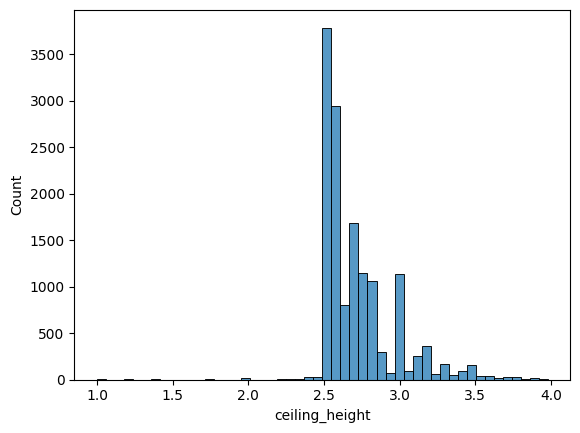

In [17]:
#посмотрим на распределение
sns.histplot(data=data.query('ceiling_height < 4'), x="ceiling_height", bins=50);

In [18]:
#откинем значания ниже 2х метров, как аномальные. пропуски ззаполним медианой
data.ceiling_height.fillna(data.ceiling_height.median(), inplace=True)
data.query("ceiling_height >= 2", inplace=True)

<div class="alert-warning">
<b>Комментарий ревьюера ⚠️</b>
    
Замена пропусков на медиану в данном случае возможна.

Обрати только внимание, что хардкодинг (или ручной ввод цифр) лучше в работе не использовать, он часто приводит к ошибкам, особенно при изменении исходных данных. Можно не только ввести неверные данные, но и вообще забыть, что эти данные нужно изменить. Целесообразнее использовать переменные.</div>

<p>
<div class="alert-info">
<b>Комментарий студента</b>

Учел.</div>

In [19]:
data.ceiling_height.describe()

count    23695.000000
mean         2.698419
std          0.241826
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         10.300000
Name: ceiling_height, dtype: float64

In [20]:
#разобъем высоту потолков на категории
data['ceiling_ctgry'] = pd.cut(data.ceiling_height, [0, 2.5, 2.65, 2.75, 3, 4, np.inf])

In [21]:
data['ceiling_ctgry'].value_counts()

(2.5, 2.65]     13193
(0.0, 2.5]       3595
(2.75, 3.0]      2721
(2.65, 2.75]     2678
(3.0, 4.0]       1456
(4.0, inf]         52
Name: ceiling_ctgry, dtype: int64

**total_area**

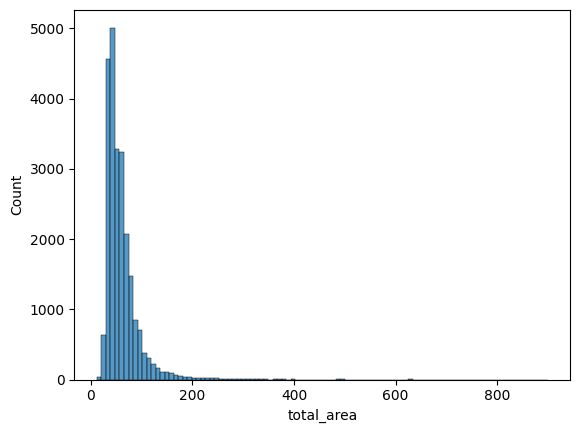

In [22]:
#обработка столбца total_area
#смотрим на распределение
sns.histplot(data=data, x="total_area", bins=100);

In [23]:
data.sort_values(by='total_area').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ceiling_ctgry
19904,4,2400000.0,12.0,2017-07-19T00:00:00,1,2.55,5.0,10.0,2,False,...,NaN,Санкт-Петербург,21314.0,964.0,1.0,886.0,2.0,45.0,200.0,"(2.5, 2.65]"
17961,3,1400000.0,13.0,2017-12-03T00:00:00,1,2.60,9.0,NaN,1,False,...,NaN,Санкт-Петербург,14350.0,15945.0,0.0,NaN,1.0,185.0,410.0,"(2.5, 2.65]"
19546,3,1850000.0,13.0,2019-03-11T00:00:00,1,3.40,5.0,NaN,2,False,...,NaN,Санкт-Петербург,24915.0,5483.0,1.0,644.0,0.0,NaN,24.0,"(3.0, 4.0]"
19807,0,3800000.0,13.0,2018-07-04T00:00:00,1,2.65,5.0,10.0,3,False,...,NaN,Санкт-Петербург,21302.0,1242.0,1.0,592.0,3.0,27.0,9.0,"(2.5, 2.65]"
19558,2,1686000.0,13.2,2018-12-17T00:00:00,1,2.65,5.0,NaN,1,False,...,NaN,Санкт-Петербург,19891.0,4165.0,1.0,361.0,1.0,155.0,19.0,"(2.5, 2.65]"


In [24]:
data.sort_values(by='total_area').tail()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ceiling_ctgry
5358,20,65000000.0,590.0,2019-02-14T00:00:00,15,3.50,6.0,409.0,3,False,...,NaN,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0,"(3.0, 4.0]"
15651,20,300000000.0,618.0,2017-12-18T00:00:00,7,3.40,7.0,258.0,5,False,...,NaN,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,111.0,"(3.0, 4.0]"
3117,19,140000000.0,631.0,2019-03-30T00:00:00,7,2.65,5.0,NaN,5,False,...,NaN,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN,"(2.5, 2.65]"
12859,20,140000000.0,631.2,2019-04-09T00:00:00,7,3.90,4.0,322.3,4,False,...,1.0,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN,"(3.0, 4.0]"
19540,8,420000000.0,900.0,2017-12-06T00:00:00,12,2.80,25.0,409.7,25,False,...,NaN,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0,"(2.75, 3.0]"


In [25]:
#видимых аномалий нет

**floors_total**

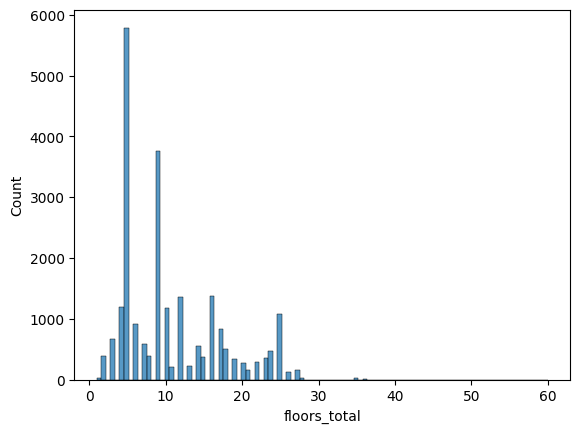

In [26]:
#обработка столбца total_area
#смотрим на распределение
sns.histplot(data=data, x="floors_total", bins=100);

In [27]:
data.floors_total.describe()

count    23609.000000
mean        10.672879
std          6.595224
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [28]:
#смотрим на крайние значения
data.query('floors_total > 36').sort_values(by='floors_total')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ceiling_ctgry
16731,9,3978000.0,40.0,2018-09-24T00:00:00,1,2.65,52.0,10.5,18,False,...,NaN,Санкт-Петербург,20728.0,12978.0,1.0,793.0,0.0,NaN,45.0,"(2.5, 2.65]"
2253,12,3800000.0,45.5,2018-06-28T00:00:00,2,2.88,60.0,27.4,4,False,...,NaN,Кронштадт,67763.0,49488.0,2.0,342.0,3.0,614.0,166.0,"(2.75, 3.0]"


In [29]:
#удалим аномальные значения
data.query("floors_total <= 36", inplace=True)
data.floors_total.astype('int32', copy=False)

0        16
1        11
2         5
3        14
4        14
         ..
23694     5
23695     5
23696     3
23697    17
23698     5
Name: floors_total, Length: 23607, dtype: int32

In [30]:
#поскольку замену для пропущенных значений найти не удается оставим их как есть.

**kitchen_area**

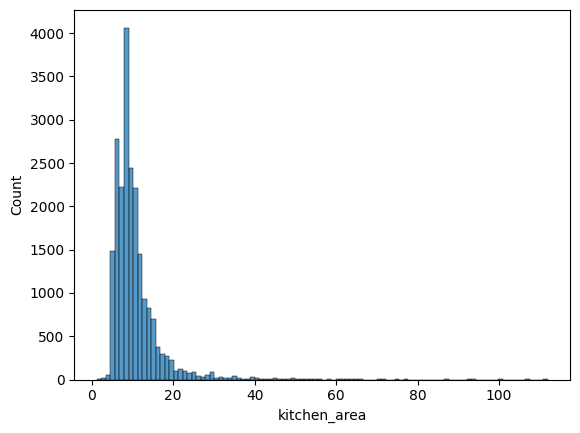

In [31]:
#обработка столбца kitchen_area
#смотрим на распределение
sns.histplot(data=data, x="kitchen_area", bins=100);

In [32]:
data.kitchen_area.describe()

count    21376.000000
mean        10.564565
std          5.904915
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

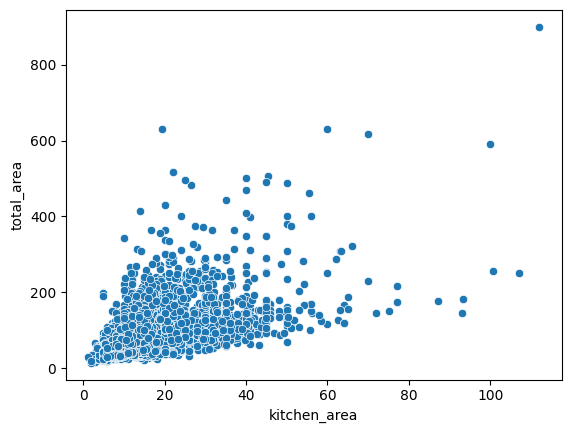

In [33]:
#построим график отношения площади кухни к площади комнаты
sns.scatterplot(data=data, x='kitchen_area', y='total_area');

In [34]:
#проверим, что площадь кухни всегда больше общей площади
data.query('kitchen_area > total_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ceiling_ctgry


<div class="alert-warning">
<b>Комментарий ревьюера ⚠️</b>

Ты выявил, что площадь кухни коррелирует с общей площадью. Как можно использовать эту информацию для заполнения пропусков в этом столбце?</div>

<div class="alert-info">
<b>Комментарий студента</b>

Корреляция не самая большая. Мне кажется вместо вычисления значений, лучше использовать заполнение ближайшим згачением в отсортированном списке по общей площади. Вычисления ниже.

</div>

In [35]:
data['kitchen_area'].corr(data['total_area'])

0.6094793091211771

In [36]:
#заполним пропуски ближайшими значениями. сначала распространнение вперед, 
#чтобы заполнить от меньшего к большему. затем в обратную сторону, чтобы запонить не затронутое.
data.kitchen_area = data.sort_values(by='total_area')['kitchen_area'].fillna(method='ffill')
data.kitchen_area = data.sort_values(by='total_area')['kitchen_area'].fillna(method='bfill')

In [37]:
data[['kitchen_area', 'total_area']].sort_values(by='total_area')#check

,kitchen_area,total_area
19904,2.0,12.0
19546,2.0,13.0
19807,2.0,13.0
17961,2.0,13.0
19558,2.0,13.2
...,...,...
5358,100.0,590.0
15651,70.0,618.0
3117,60.0,631.0
12859,19.5,631.2


**airports_nearest**

In [38]:
#посмотрим аномальные значения
data.query('airports_nearest < 3000')['airports_nearest']

21085    0.0
Name: airports_nearest, dtype: float64

In [39]:
#заменим 0 на NaN
data.loc[data['airports_nearest'] == 0,['airports_nearest']] = np.NaN

In [40]:
data.query('airports_nearest < 3000')['airports_nearest']

Series([], Name: airports_nearest, dtype: float64)

In [41]:
data.airports_nearest.describe()

count    18075.000000
mean     28788.984011
std      12622.329447
min       6450.000000
25%      18575.500000
50%      26729.000000
75%      37243.000000
max      84869.000000
Name: airports_nearest, dtype: float64

<div class="alert-danger">
<b>Комментарий ревьюера ❌</b>

А зачем нам нули менять на пропуски в этом столбце, ведь у нас обратная задача - по максимуму избавиться от пропусков. </div>

In [42]:
data[data['airports_nearest'].isna()].groupby('locality_name')['airports_nearest'].count()

locality_name
Бокситогорск            0
Волосово                0
Волхов                  0
Всеволожск              0
Выборг                  0
                       ..
село Путилово           0
село Рождествено        0
село Русско-Высоцкое    0
село Старая Ладога      0
село Шум                0
Name: airports_nearest, Length: 344, dtype: int64

<div class="alert-info">
<b>Комментарий студента</b>

Я не смог придумать, на какое значение заменить, чтобы не испортить данные. Логично будет заменить на медиану по каждому населенному пункту. Но такой подход не работает из-за того что есть населенные пункты без данных по аэропортам. В то же время значения nan не участвуют в вычислениях, что упрощает обработку в некоторых случаях. 
Значания 0, max, mean, median плохи тем, что влияют на статистику по выборке.
</div>

**balcony**

In [43]:
#обработка столбца balcony
#заменим значения NaN на 0
data.loc[data['balcony'].isna(),['balcony']] = 0

In [44]:
data.balcony.isna().sum()

0

<div class="alert-success">
<b>Комментарий ревьюера ✔️</b>

Верно, если в объявлении не указано количество балконов, скорее всего их нет.</div>

**locality_name**

In [45]:
#проведем устранение неявных дубликатов
data.locality_name.unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [46]:
len(data.locality_name.unique())

365

In [47]:
#заменим 'поселок' на 'посёлок'
data.locality_name = data.locality_name.str.replace('поселок', 'посёлок');

In [48]:
len(data.locality_name.unique())

331

In [49]:
#создадим словарь для замен дубликатов
d=data.locality_name.dropna().unique() # в d сохраним список дубликатов
l = []                                 # вспомогательный спсисок
for i in range(len(d)):                # цикл создает список списков дубликатов 
    l.append([d[i]])
    s = d[i].split()[-1]
    for j in range(i+1,len(d)):
        if s == d[j].split()[-1]:
            l[i].append(d[j])
res = {x[0]:x[1] for x in l if len(x) == 2}  # предварительный словарь для замены
res

{'посёлок Мурино': 'Мурино',
 'деревня Кудрово': 'Кудрово',
 'деревня Фёдоровское': 'городской посёлок Фёдоровское',
 'садовое товарищество Новая Ропша': 'посёлок Ропша',
 'Никольское': 'село Никольское',
 'посёлок Романовка': 'деревня Малая Романовка',
 'посёлок городского типа Рощино': 'городской посёлок Рощино',
 'посёлок городского типа Советский': 'городской посёлок Советский',
 'городской посёлок Большая Ижора': 'посёлок городского типа Большая Ижора',
 'городской посёлок Павлово': 'посёлок городского типа Павлово',
 'городской посёлок Лесогорский': 'посёлок городского типа Лесогорский',
 'посёлок городского типа Рахья': 'садовое товарищество Рахья',
 'деревня Большие Колпаны': 'деревня Малые Колпаны',
 'Новая Ладога': 'село Старая Ладога',
 'посёлок Зимитицы': 'деревня Зимитицы',
 'посёлок Рябово': 'посёлок городского типа Рябово',
 'деревня Бегуницы': 'деревня Старые Бегуницы',
 'городской посёлок Мга': 'посёлок городского типа Мга',
 'посёлок станции Вещево': 'посёлок при желе

In [50]:
#отфильтруем получившийся словарь вручную. и произведем замену
rplce_dict = {'посёлок Мурино': 'Мурино',
 'деревня Кудрово': 'Кудрово',
 'деревня Фёдоровское': 'городской посёлок Фёдоровское',
 'Никольское': 'село Никольское',
 'посёлок городского типа Рощино': 'городской посёлок Рощино',
 'посёлок городского типа Советский': 'городской посёлок Советский',
 'городской посёлок Большая Ижора': 'посёлок городского типа Большая Ижора',
 'городской посёлок Павлово': 'посёлок городского типа Павлово',
 'городской посёлок Лесогорский': 'посёлок городского типа Лесогорский',
 'посёлок городского типа Рахья': 'садовое товарищество Рахья',
 'посёлок Зимитицы': 'деревня Зимитицы',
 'посёлок Рябово': 'посёлок городского типа Рябово',
 'городской посёлок Мга': 'посёлок городского типа Мга',
 'посёлок станции Вещево': 'посёлок при железнодорожной станции Вещево',
 'деревня Калитино': 'посёлок Калитино',
 'посёлок городского типа Приладожский': 'садовое товарищество Приладожский',
 'посёлок Щеглово': 'деревня Щеглово',
 'деревня Рабитицы': 'посёлок Рабитицы',
 'городской посёлок Назия': 'посёлок городского типа Назия',
 'деревня Гарболово': 'посёлок Гарболово',
 'посёлок станции Приветнинское': 'посёлок при железнодорожной станции Приветнинское',
 'Любань': 'посёлок Любань',
 'посёлок станции Громово': 'посёлок Громово',
 'посёлок Лесное': 'коттеджный посёлок Лесное',
 }

data.locality_name = data.locality_name.replace(rplce_dict);
len(data.locality_name.unique()) #check

307

In [51]:
data.locality_name.isna().sum()

48

In [52]:
#удалим строки с пустыми значениями
data.dropna(subset=['locality_name'], inplace=True)
data.locality_name.isna().sum()

0

**ponds_around3000**

In [53]:
#обработка столбца ponds_around3000
#заменим значения NaN на 0
data.loc[data['ponds_around3000'].isna(),['ponds_around3000']] = 0

In [54]:
data.ponds_around3000.isna().sum()

0

**parks_around3000**

In [55]:
#обработка столбца parks_around3000
#заменим значения NaN на 0
data.loc[data['parks_around3000'].isna(),['parks_around3000']] = 0

In [56]:
data.parks_around3000.isna().sum()

0

<div class="alert-warning">
<b>Комментарий ревьюера ⚠️</b>

В тех столбцах, где данные должны подтягиваться из геолокации, заменить пропуски расчетными значениями точно довольно сложно.</div>

<div class="alert-info">
<b>Комментарий студента</b>

Мне кажется здесь ситуция похожа на ситуацию с балконами. Если нет данных значит скорее всего и парков и прудов рядом нет.
</div>

In [57]:
#приводим типы
data = data.astype({'balcony':'int32', 
                    'parks_around3000':'int32', 
                    'ponds_around3000':'int32', 
                    'floors_total':'int32',
                    'last_price':'int32',
                    'airports_nearest':'int32',
                    'parks_nearest':'int32',        
                    'ponds_nearest':'int32',       
                    'days_exposition':'int32',
                    'cityCenters_nearest' :'int32',  
                   }, copy=True, errors='ignore')

**first_day_exposition**

In [58]:
#приведем к типу datetime
data.first_day_exposition = pd.to_datetime(data.first_day_exposition,format='%Y-%m-%dT%H:%M:%S')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23559 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23559 non-null  int64         
 1   last_price            23559 non-null  int32         
 2   total_area            23559 non-null  float64       
 3   first_day_exposition  23559 non-null  datetime64[ns]
 4   rooms                 23559 non-null  int64         
 5   ceiling_height        23559 non-null  float64       
 6   floors_total          23559 non-null  int32         
 7   living_area           21694 non-null  float64       
 8   floor                 23559 non-null  int64         
 9   is_apartment          23559 non-null  bool          
 10  studio                23559 non-null  bool          
 11  open_plan             23559 non-null  bool          
 12  kitchen_area          23559 non-null  float64       
 13  balcony         

In [59]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1865
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5500
parks_around3000            0
parks_nearest           15532
ponds_around3000            0
ponds_nearest           14526
days_exposition          3171
ceiling_ctgry               0
dtype: int64

<div class="alert-danger">
<b>Комментарий ревьюера ❌</b>

По итогу предобработки остались пропуски в столбцах:
    
* living_area
* kitchen_area
* locality_name
* airports_nearest
* cityCenters_nearest
* parks_around3000
* parks_nearest
* ponds_nearest
* days_exposition

Нужно либо их обработать, либо дать пояснение почему этого делать не стоит.

По итогу шага нужно написать вывод - что было сделано, какие изменения претерпел исходный датафрейм.</div>

**living_area**

In [60]:
#заполним пропущенные значения ближайшими
#чтобы заполнить от меньшего к большему. затем в обратную сторону, чтобы запонить не затронутое.
data.living_area = data.sort_values(by='total_area')['living_area'].fillna(method='ffill')
data.living_area = data.sort_values(by='total_area')['living_area'].fillna(method='bfill')

In [61]:
data[['living_area', 'total_area']].sort_values(by='total_area')#check

,living_area,total_area
19904,10.0,12.0
19546,10.0,13.0
17961,10.0,13.0
19807,10.0,13.0
19558,10.0,13.2
...,...,...
5358,409.0,590.0
15651,258.0,618.0
3117,258.0,631.0
12859,322.3,631.2


days_exposition

In [62]:
data_expos = data.groupby('first_day_exposition').mean()

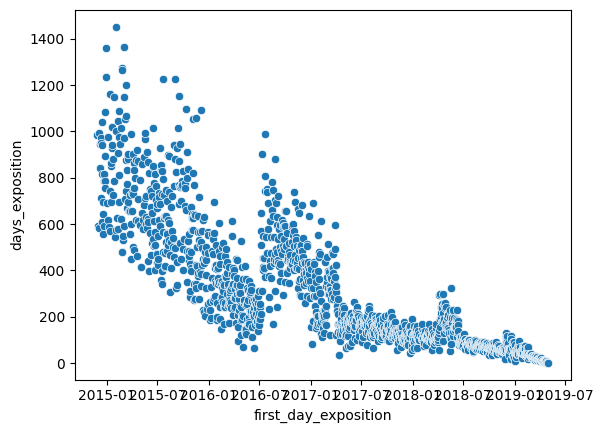

In [63]:
sns.scatterplot(data=data_expos, x = 'first_day_exposition', y = 'days_exposition');

По средним данным не получается понять, как заполнить пропуски.

In [64]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5500
parks_around3000            0
parks_nearest           15532
ponds_around3000            0
ponds_nearest           14526
days_exposition          3171
ceiling_ctgry               0
dtype: int64

*Вывод*

По итогу остались не заполненны столбцы:
- airports_nearest        
- cityCenters_nearest      
- parks_nearest           
- ponds_nearest           
- days_exposition          

Не заполненные данные не могут быть вычеслены из сущестующх столбцов. Удаление сильно сократит датасет. Пожтому принято решение прекратить предобработку на достигнутых результатах.

## Добавление столбцов

In [65]:
#Добавим столбцы: цена одного квадратного метра; день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
#месяц публикации объявления; год публикации объявления; тип этажа квартиры (значения — «первый», «последний», «другой»);
#расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

data['price_for_sqr'] = data['last_price'] / data['total_area']
data['exposition_start_DOW'] = data['first_day_exposition'].dt.day_of_week
data['exposition_start_month'] = data['first_day_exposition'].dt.month
data['exposition_start_year'] = data['first_day_exposition'].dt.year
data['cityCenters_nearest_km'] = (data['cityCenters_nearest'] / 1000).round(0)




In [66]:
def ctgry_floor(row):
    fl = row['floor']
    fl_tot = row['floors_total']
    if fl == 1:
        return 'первый'
    elif fl == fl_tot:
        return 'последний'
    else:
        return 'другой'

data['floor_ctgry'] = data.apply(ctgry_floor, axis=1)


In [67]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,ceiling_ctgry,price_for_sqr,exposition_start_DOW,exposition_start_month,exposition_start_year,cityCenters_nearest_km,floor_ctgry
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,2,755.0,NaN,"(2.65, 2.75]",120370.370370,3,3,2019,16.0,другой
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,0,NaN,81.0,"(2.5, 2.65]",82920.792079,1,12,2018,19.0,первый
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,2,574.0,558.0,"(2.5, 2.65]",92785.714286,3,8,2015,14.0,другой
3,0,64900000,159.0,2015-07-24,3,2.65,14,95.0,9,False,...,3,234.0,424.0,"(2.5, 2.65]",408176.100629,4,7,2015,7.0,другой
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,1,48.0,121.0,"(3.0, 4.0]",100000.000000,1,6,2018,8.0,другой


<div class="alert-success">
<b>Комментарий ревьюера ✔️</b>

Дополнительные данные рассчитаны правильно.

Молодец, что провел категоризацию этажности через функцию.</div>

<div class="alert-warning">
<b>Комментарий ревьюера ⚠️</b>
    
Не забывай пожалуйста заканчивать каждый шаг работы кратким выводом.</div>

*Вывод*

Были добалены дополнительные столбцы в соотвествии с указанными выше условиями.



## Исследование

<div class="alert-danger">
<b>Комментарий ревьюера ❌</b>
    
По заданию нужно изучить следующие параметры объектов:
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- этаж квартиры;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего аэропорта;
- расстояние до ближайшего парка;
- день и месяц публикации объявления.
    
Построить отдельные гистограммы для каждого из этих параметров. Опишите все ваши наблюдения по параметрам в ячейке с типом markdown.</div>

### Изучение параметров

In [68]:
col = ['total_area', 'living_area', 'kitchen_area', 
          'last_price', 'rooms', 'ceiling_height', 
          'floor', 'floor_ctgry', 'floors_total', 
          'cityCenters_nearest', 'airports_nearest', 
          'parks_nearest', 'exposition_start_DOW', 
          'exposition_start_month']

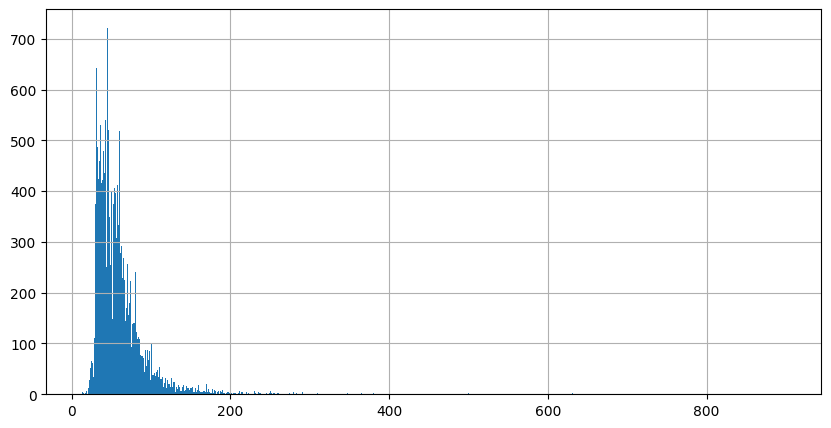

In [69]:
data['total_area'].hist(figsize=(10,5), bins=1000);

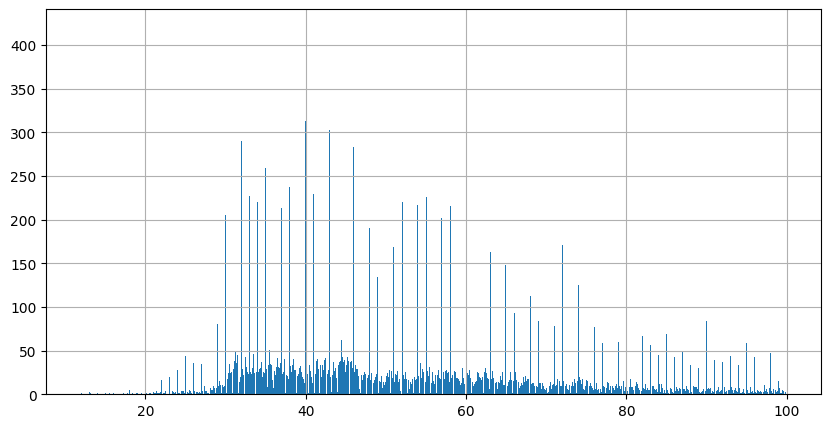

In [70]:
data.query('total_area < 100')['total_area'].hist(figsize=(10,5), bins=1000);

In [71]:
data1 = data
data1['total_area'] = data1['total_area'].astype('int32')

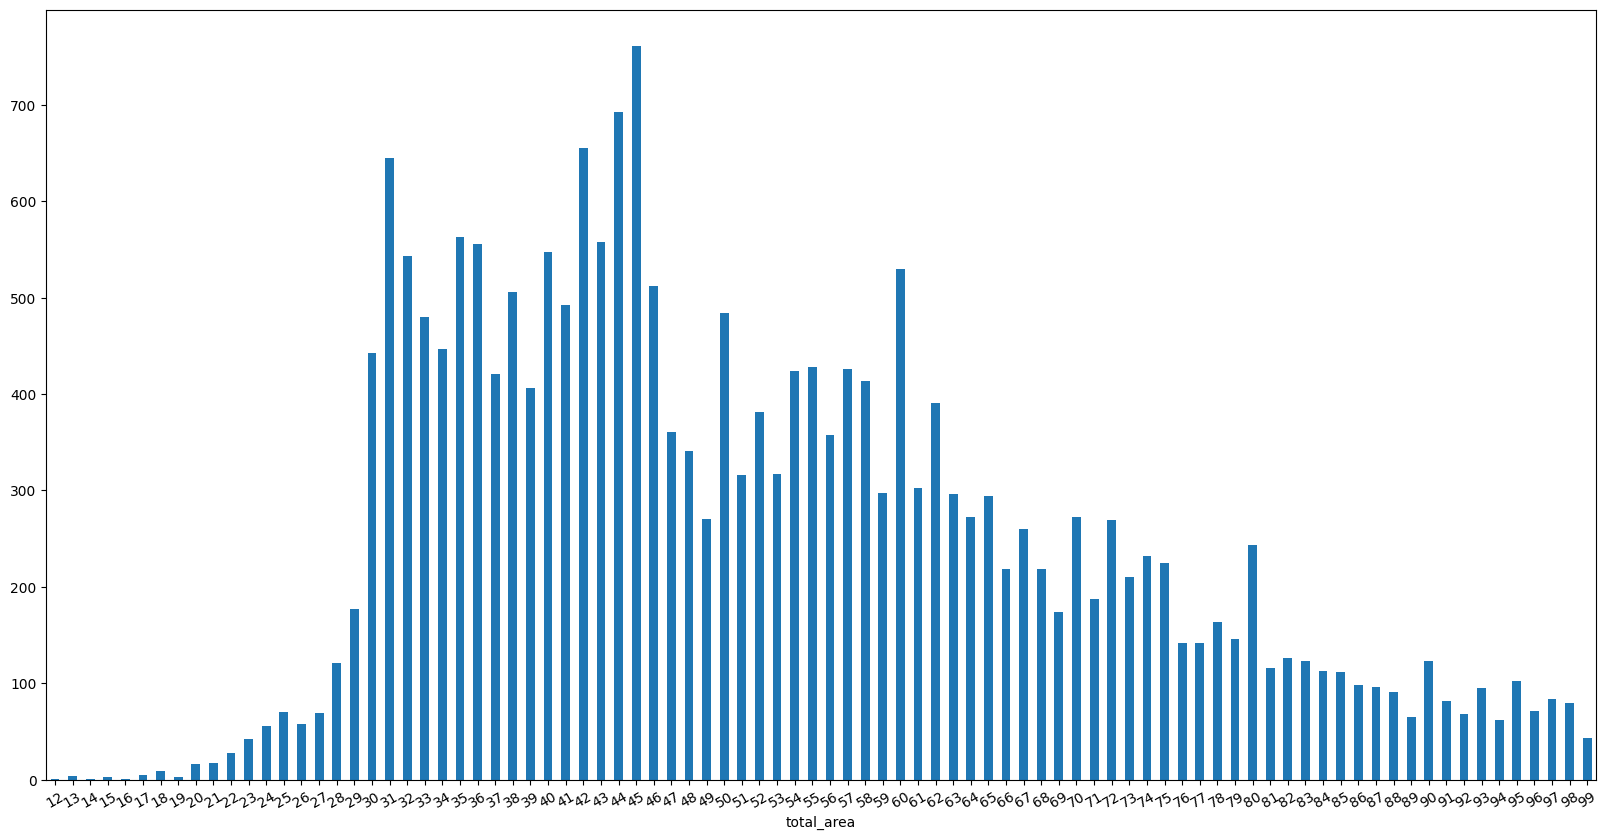

In [72]:
hist1 = data1.query('total_area < 100').groupby('total_area')['total_area'].count()
hist1.plot(kind='bar', x='total_area', rot=30, figsize=(20,10));

Количество объявлений для квартир полщадью от 30м2 до 70м2 значительно больше, чем остальных.

*living_area*

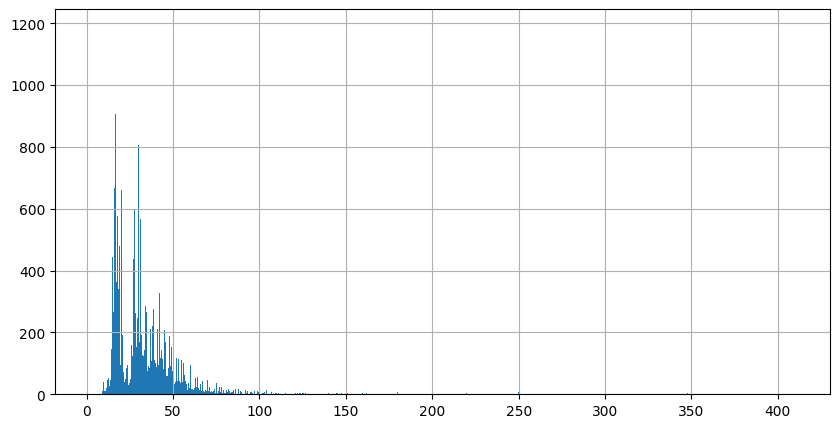

In [73]:
data['living_area'].hist(figsize=(10,5), bins=1000);

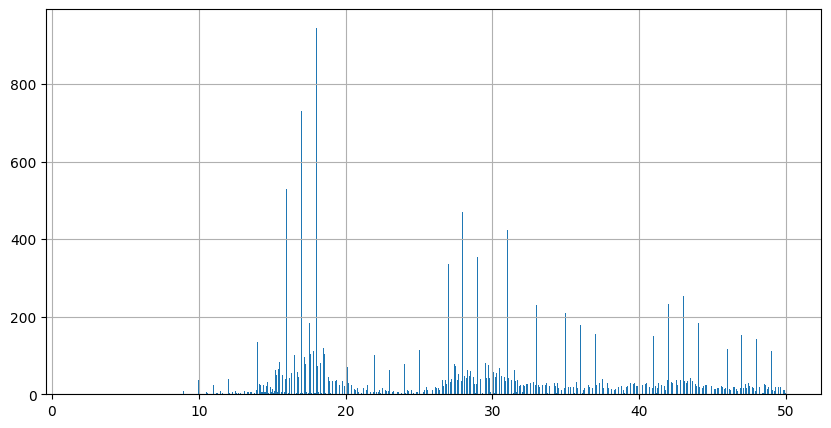

In [74]:
data.query('living_area < 50')['living_area'].hist(figsize=(10,5), bins=1000);

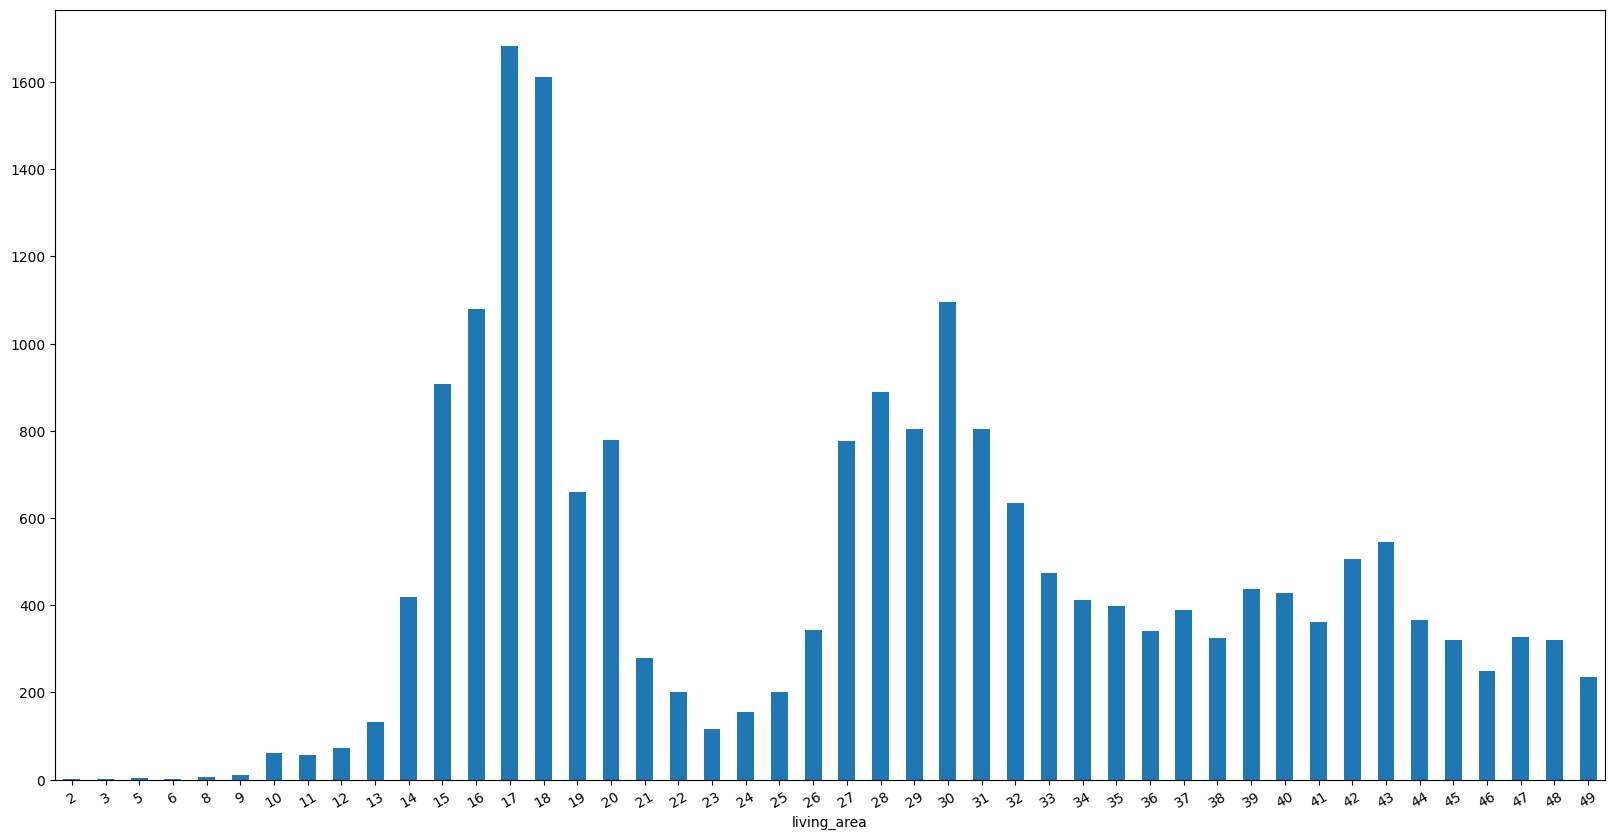

In [75]:
data1['living_area'] = data1['living_area'].astype('int32')
data1.query('living_area < 50').groupby('living_area')['living_area'].count()\
.plot(kind='bar', x='living_area', rot=30, figsize=(20,10));

На гистограме наблюдается несколько пиков. 

*kitchen_area*

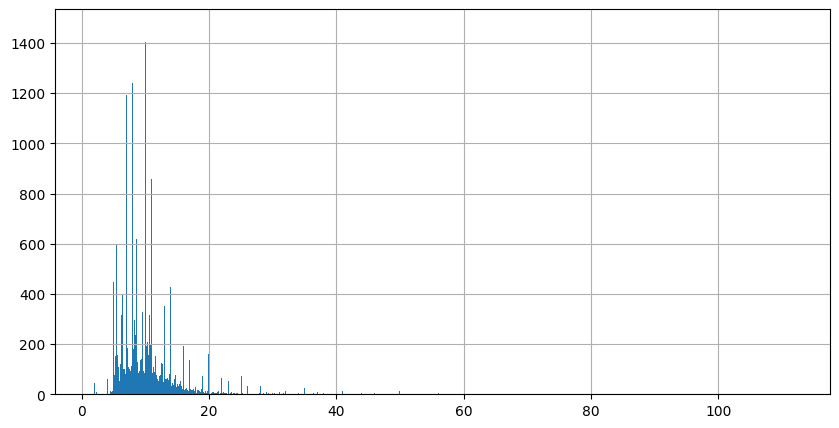

In [76]:
data['kitchen_area'].hist(figsize=(10,5), bins=1000);

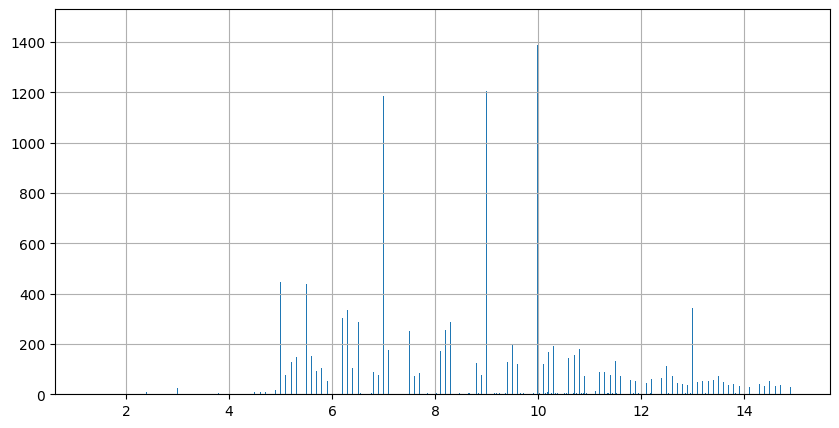

In [77]:
data.query('kitchen_area < 15')['kitchen_area'].hist(figsize=(10,5), bins=1000);

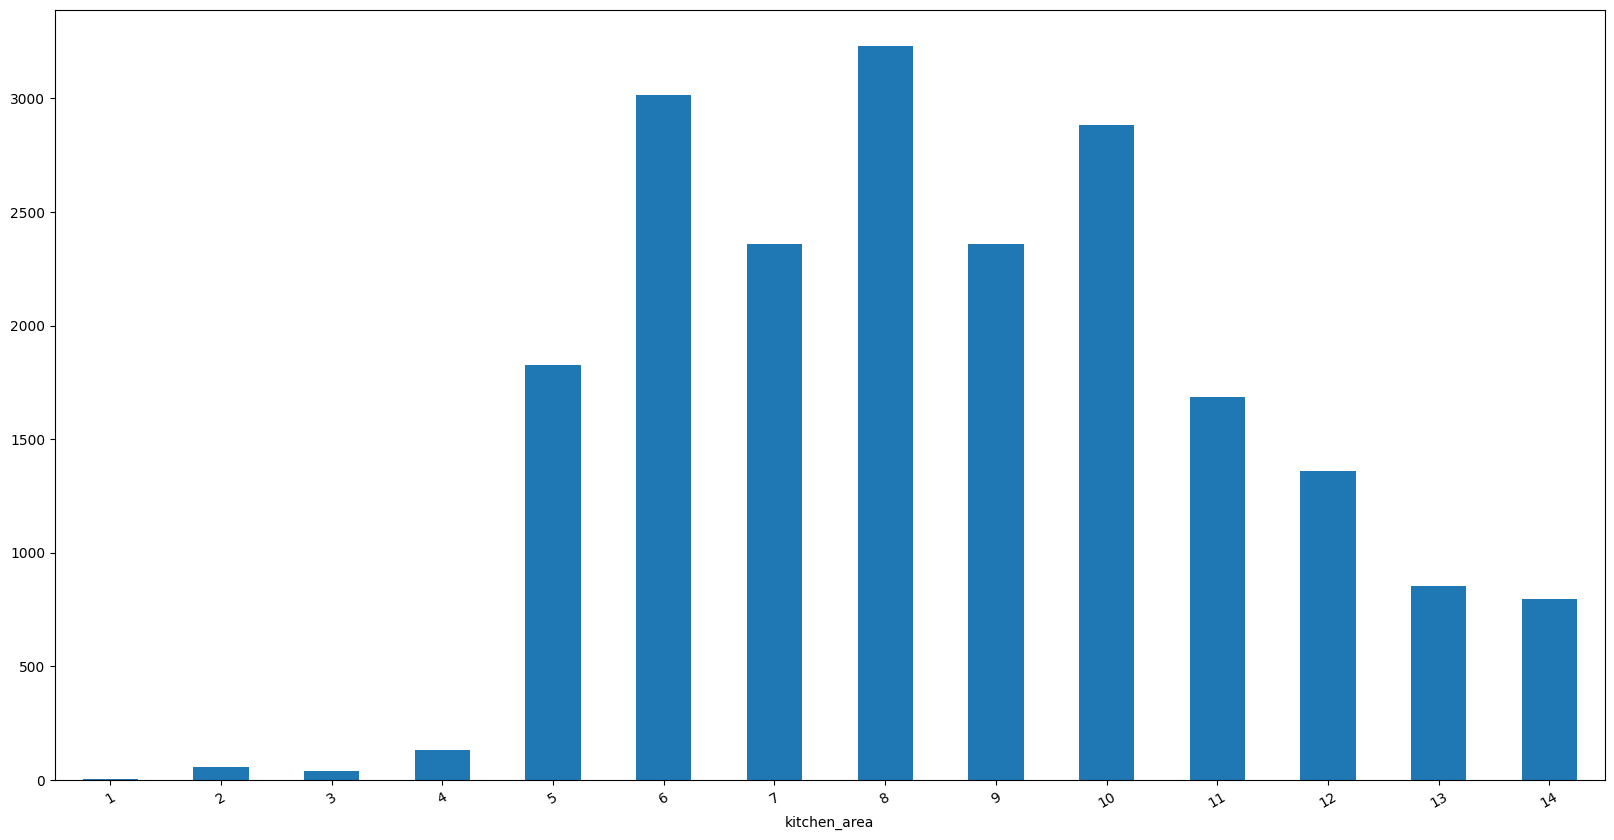

In [78]:
data1['kitchen_area'] = data1['kitchen_area'].astype('int32')
data1.query('kitchen_area < 15').groupby('kitchen_area')['kitchen_area'].count()\
.plot(kind='bar', x='living_area', rot=30, figsize=(20,10));

Наиболее часто встречаются кухни площадью от 5 до 10 м2.

*last_price*

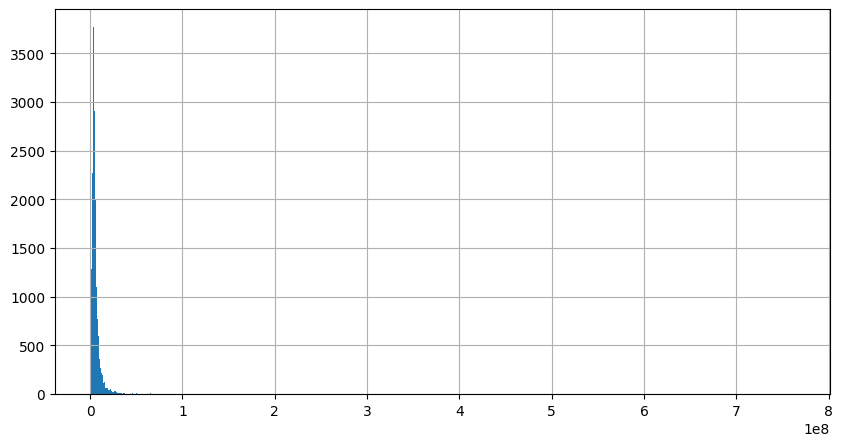

In [79]:
data['last_price'].hist(figsize=(10,5), bins=1000);

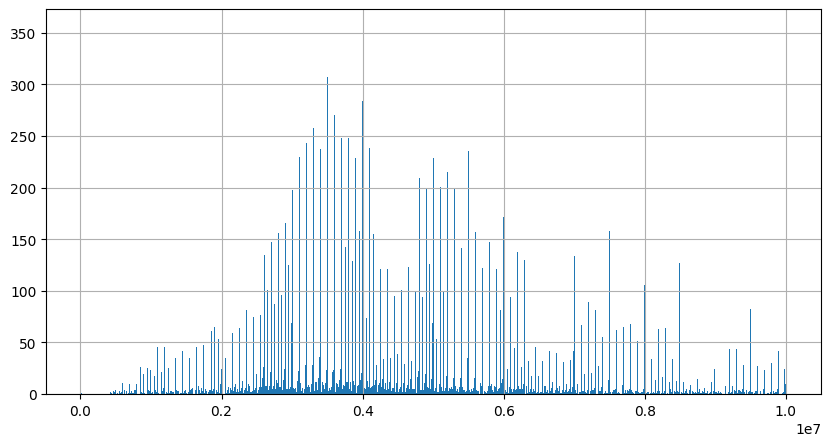

In [80]:
data.query('last_price < 10_000_000')['last_price'].hist(figsize=(10,5), bins=1000);

График имеет 2 пика. В районе 3,5 и 5 миллионов.

*rooms*

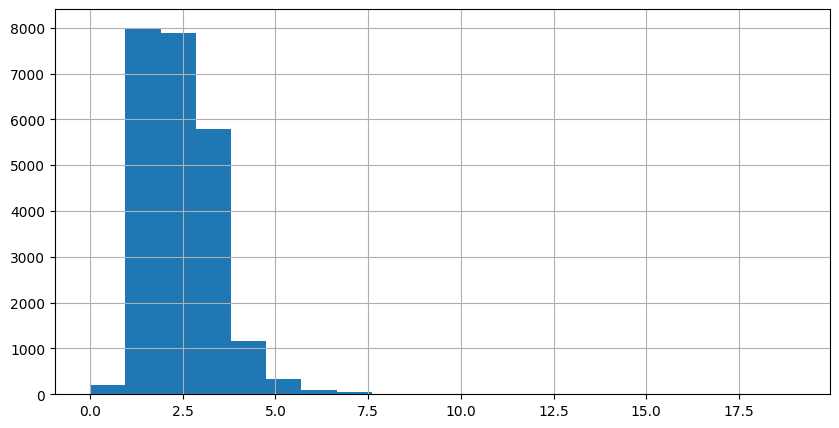

In [81]:
data['rooms'].hist(figsize=(10,5), bins=20);

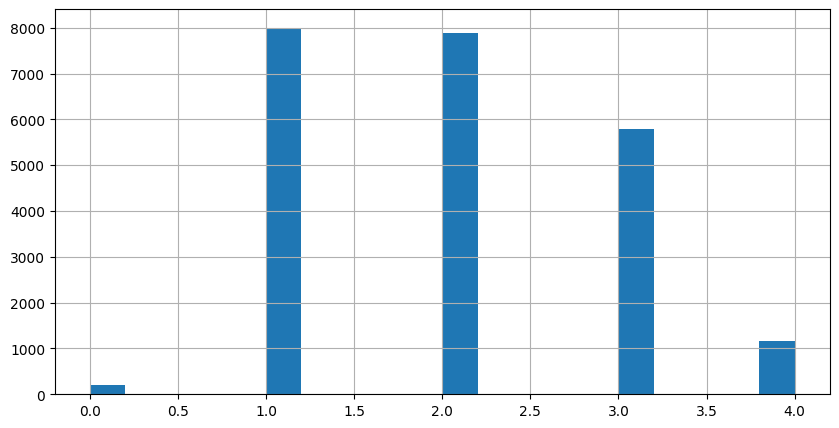

In [82]:
data.query('rooms < 5')['rooms'].hist(figsize=(10,5), bins=20);

Больше всего объявлений для 1, 2 и 3 комнатных квартир.

*ceiling_height*

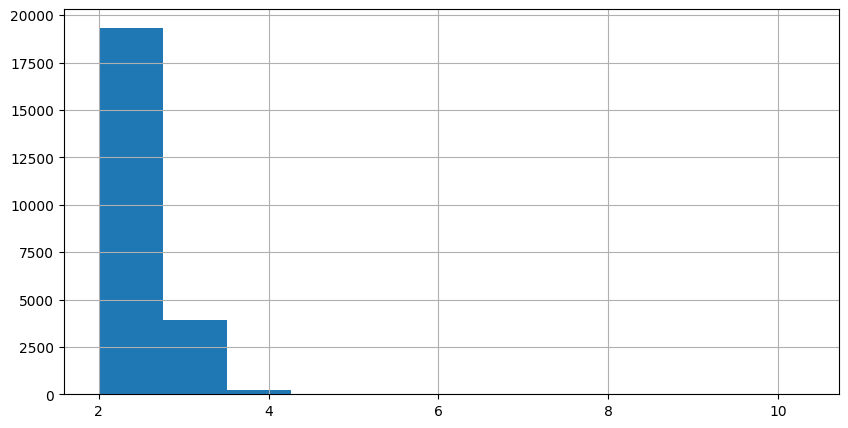

In [83]:
data['ceiling_height'].hist(figsize=(10,5), bins=11);

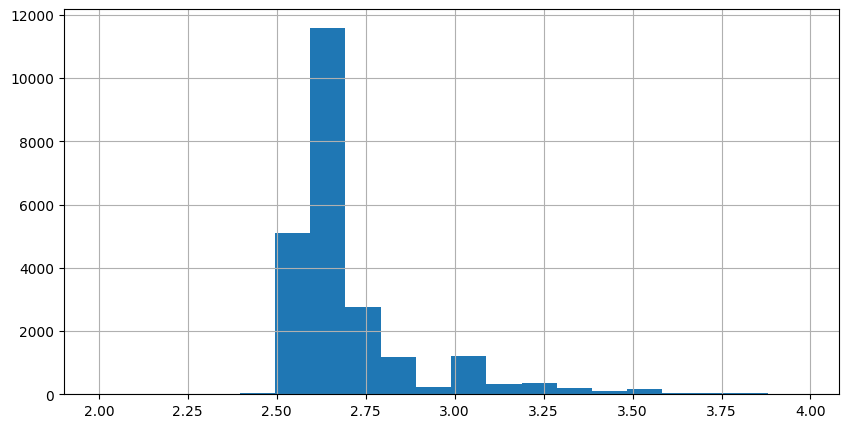

In [84]:
data.query('ceiling_height < 4')['ceiling_height'].hist(figsize=(10,5), bins=20);

Основная масса обявлений содержит квартиры с потолками в районе 2,65 м.

*floor*

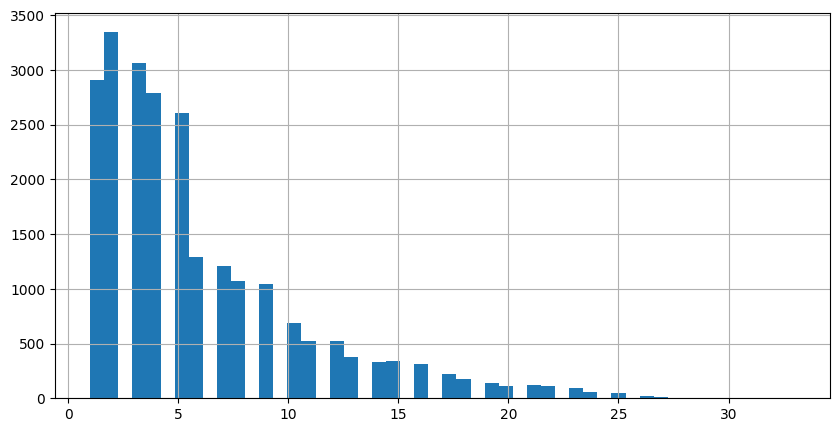

In [85]:
data['floor'].hist(figsize=(10,5), bins=50);

Больше всего объявлений о квартирах на этажах от 1 до 5.

*floor_ctgry*

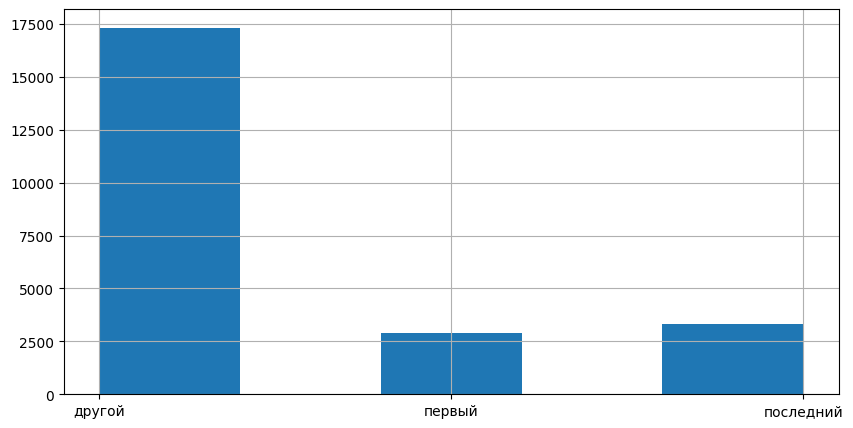

In [86]:
data['floor_ctgry'].hist(figsize=(10,5), bins=5);

Первый и последний этажи занимают значительную часть всех объявлений.

*floors_total*

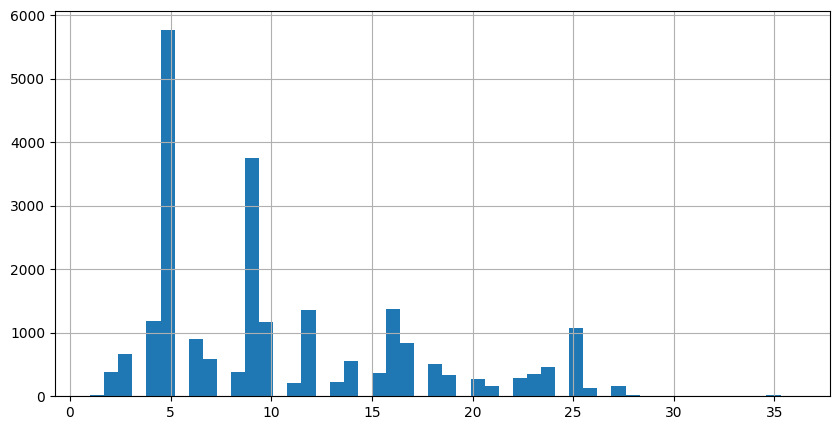

In [87]:
data['floors_total'].hist(figsize=(10,5), bins=50);

Чаще всего встречаются дома с этажностью 5 и 9

*cityCenters_nearest*

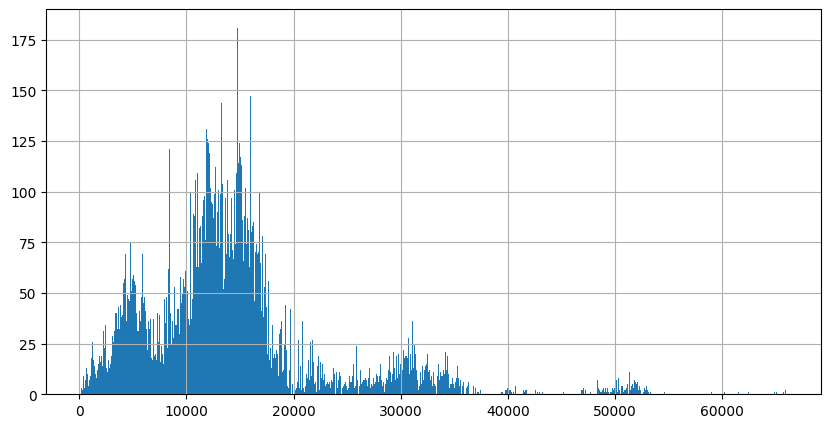

In [88]:
data['cityCenters_nearest'].hist(figsize=(10,5), bins=1000);

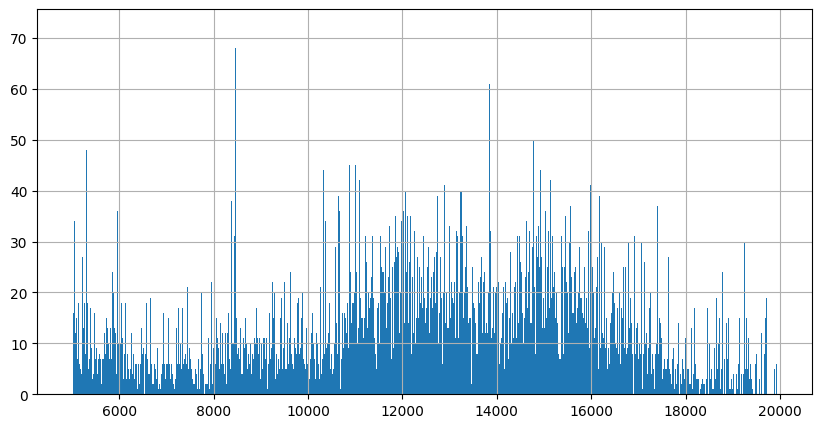

In [89]:
data.query('5_000< cityCenters_nearest < 20_000')['cityCenters_nearest'].hist(figsize=(10,5), bins=1000);

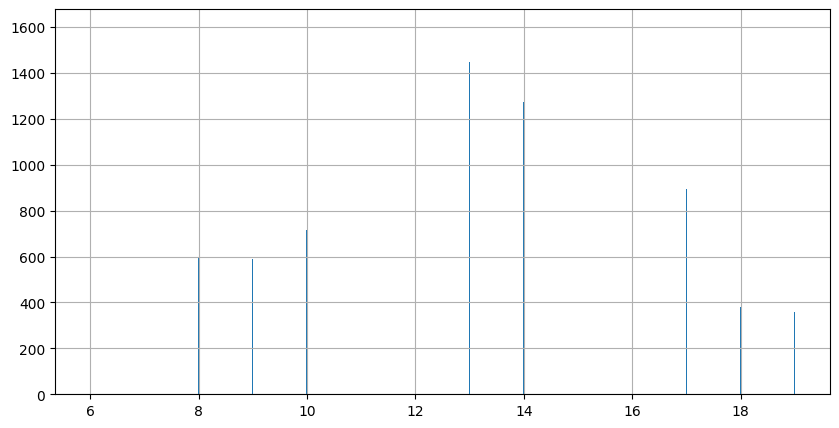

In [90]:
data.query('5 < cityCenters_nearest_km < 20')['cityCenters_nearest_km'].hist(figsize=(10,5), bins=1000);

На расстоянии ~13 км от центра наибольшее количество объявлений

*airports_nearest*

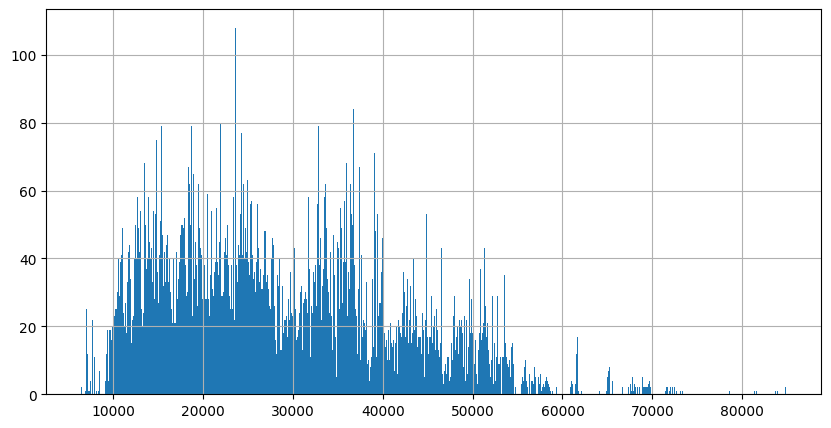

In [91]:
data['airports_nearest'].hist(figsize=(10,5), bins=1000);

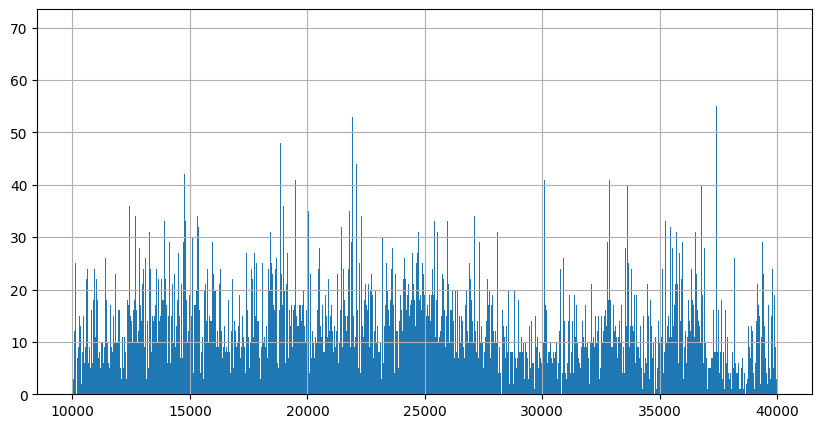

In [92]:
data.query('10_000< airports_nearest < 40_000')['airports_nearest'].hist(figsize=(10,5), bins=1000);

Объявления распределены достаточно равномерно. На расстоянии 55 км и дальше количество объявлений значительно меньше.

*parks_nearest*

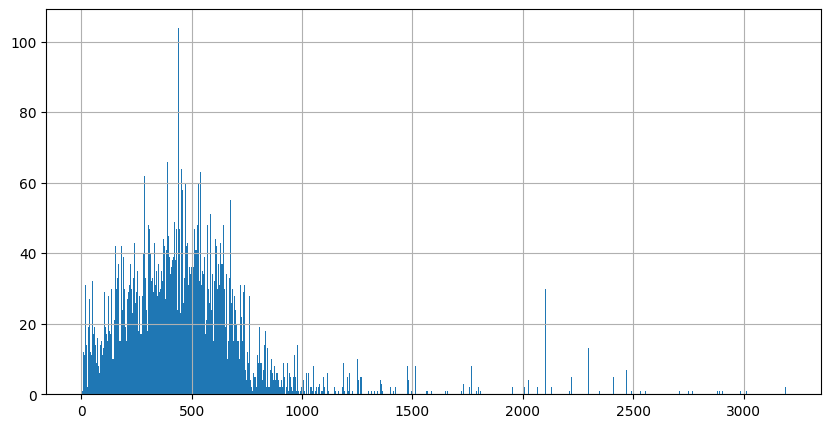

In [93]:
data['parks_nearest'].hist(figsize=(10,5), bins=1000);

Больше всего объявлений, где указан парк расположены в пределах 1км от него.

*exposition_start_DOW*

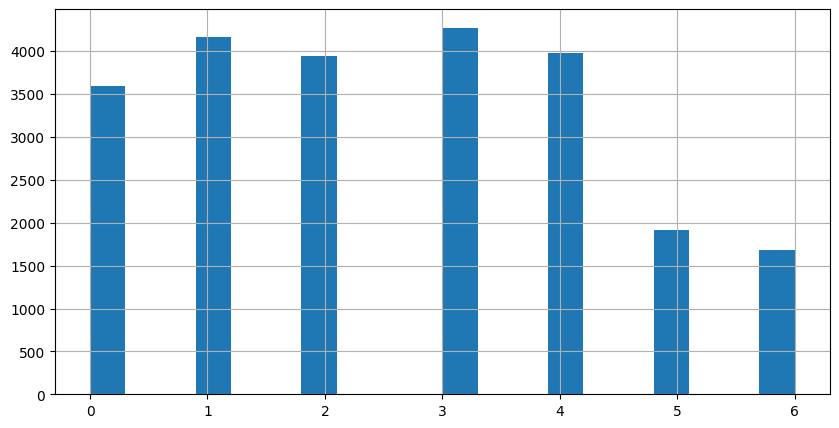

In [94]:
data['exposition_start_DOW'].hist(figsize=(10,5), bins=20);

В субботу и воскресенье размещают в 2 раза меньше объявлений.

*exposition_start_month*

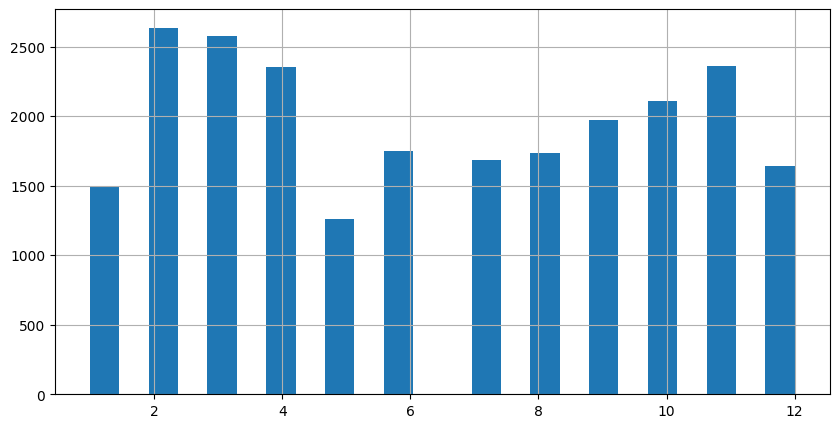

In [95]:
data['exposition_start_month'].hist(figsize=(10,5), bins=24);

Больше всего объявлений размещено с февраля по апрель. Меньше всего в мае.

**Как быстро продавались квартиры?**

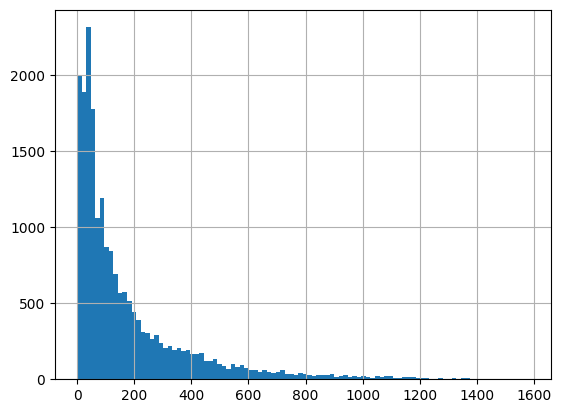

In [96]:
#проанализируем, закакое время продаются квартиры
data.days_exposition.hist(bins=100);

In [97]:
data.days_exposition.describe()

count    20388.000000
mean       180.752501
std        219.756033
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

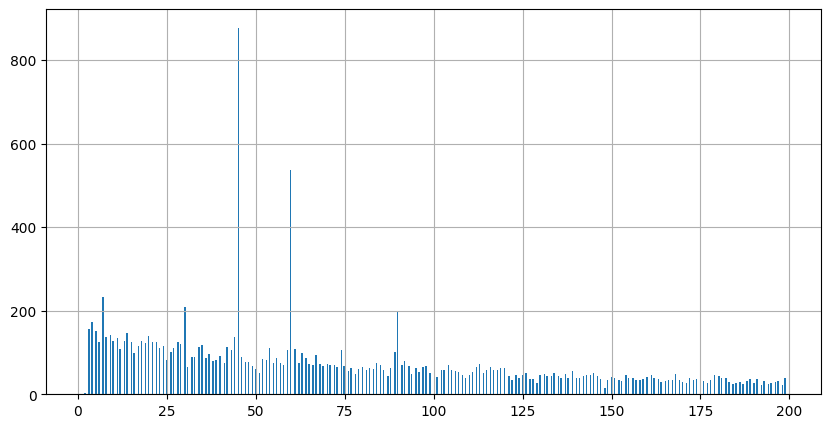

In [98]:
#рассмотрим интервал 0-200 дней
data.query('days_exposition < 200')['days_exposition'].hist(figsize=(10,5), bins=500);

In [99]:
data.query('days_exposition < 200')['days_exposition'].value_counts()

45.0     878
60.0     538
7.0      234
30.0     208
90.0     200
        ... 
198.0     23
192.0     22
148.0     16
2.0        3
1.0        1
Name: days_exposition, Length: 199, dtype: int64

В среднем квартира продается за 180 дней. При этом половина всех продаж происходит в первые 95 дней. Быстрой продажей можно считать, если квартира была прожана за первые 45 дней. Если же объявление висит более 230 дней продажу можно считать долгой.
Чеще всего квартиры продаются на 45 и 60 дни.

<div class="alert-warning">
<b>Комментарий ревьюера ⚠️</b>

С временем быстрой и долгой продажей квартиры согласен.

Однако стоит поподробнее рассмотреть диапазон, скажем, от 0 до 200 дней, возможно обнаружатся интересные факты.</div>

**Какие факторы больше всего влияют на общую (полную) стоимость объекта?**

*Зависимость от площади*

In [100]:
df1 = data.pivot_table(values='last_price', index=['total_area', 'living_area', 'kitchen_area'], aggfunc='mean')
df1.reset_index(inplace=True)
df1

,total_area,living_area,kitchen_area,last_price
0,12,10,2,2400000.0
1,13,10,2,2184000.0
2,14,11,2,1190000.0
3,15,10,2,2450000.0
4,15,11,2,1725000.0
...,...,...,...,...
9467,590,409,100,65000000.0
9468,618,258,70,300000000.0
9469,631,258,60,140000000.0
9470,631,322,19,140000000.0


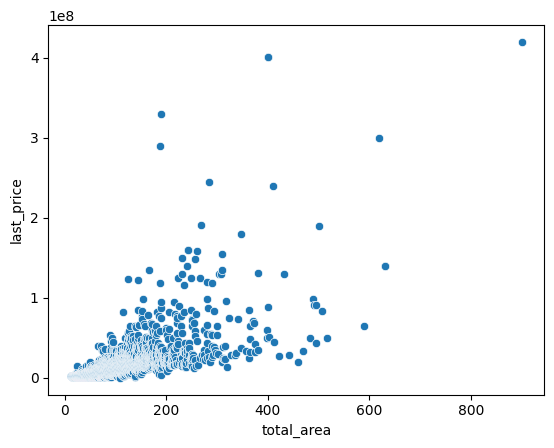

In [101]:
sns.scatterplot(data=df1, x='total_area', y='last_price');

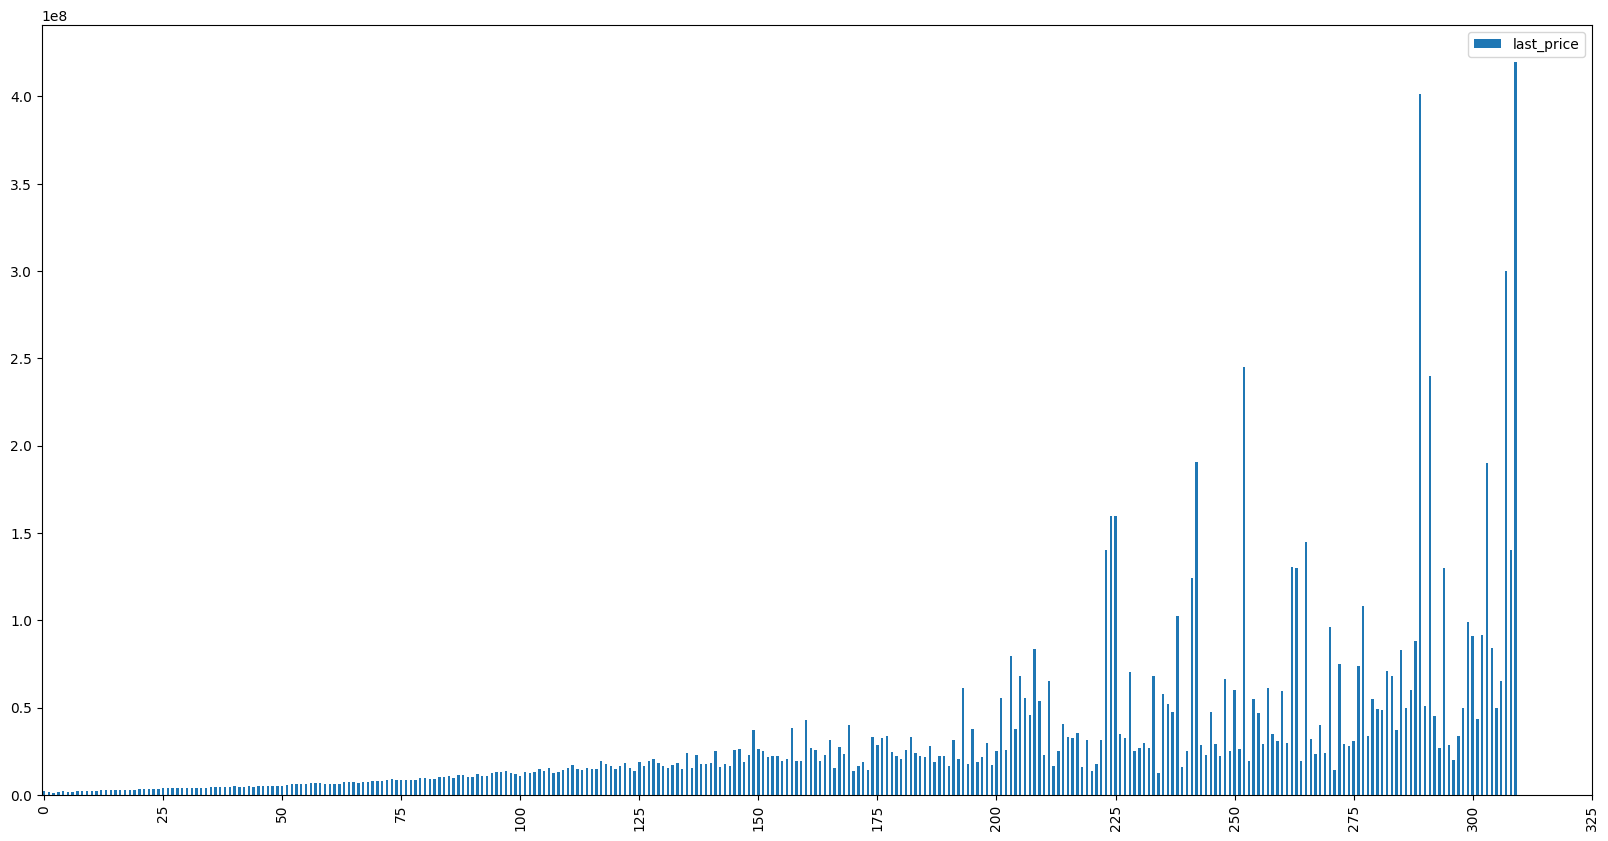

In [139]:
data.pivot_table(values='last_price', index=['total_area'], aggfunc='median').reset_index()\
.plot(x='total_area', y='last_price', use_index=False, kind='bar', xticks=range(0,350,25), figsize=(20,10));

In [104]:
df2 = data.query('last_price < 20_000_000 & total_area < 150')

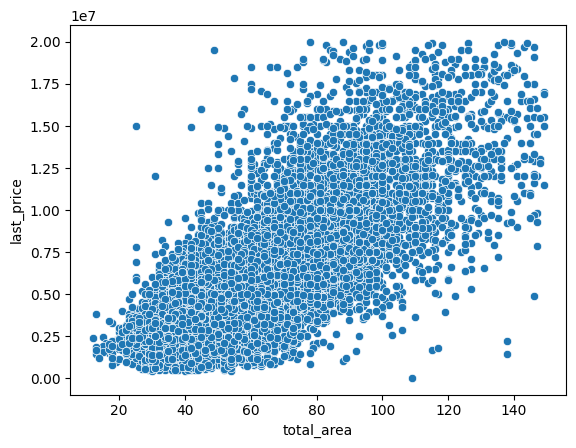

In [105]:
sns.scatterplot(data=df2, x='total_area', y='last_price');

In [106]:
display(
data['last_price'].corr(data['total_area']))

0.6535940194456997

Вывод: Зависимость цены от общей площади показывает средню корреляцию.

<div class="alert-warning">
<b>Комментарий ревьюера ⚠️</b>

А почему ты решил проверять корреляцию по средним ценам? Целесообразнее взять для проверки все имеющиеся данные.</div>

<div class="alert-info">
<b>Комментарий студента</b>
По полным данным оценка сместилась, но не сильно. 
</div>

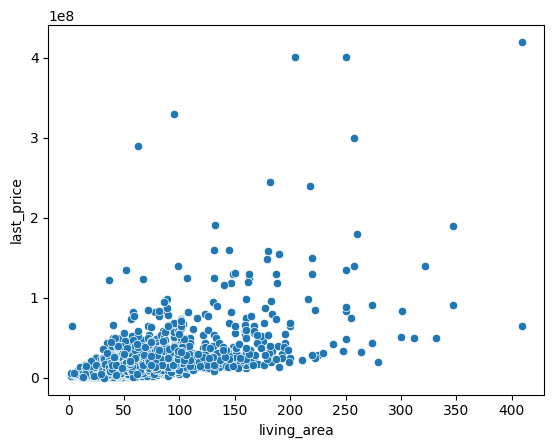

In [107]:
sns.scatterplot(data=df1, x='living_area', y='last_price');

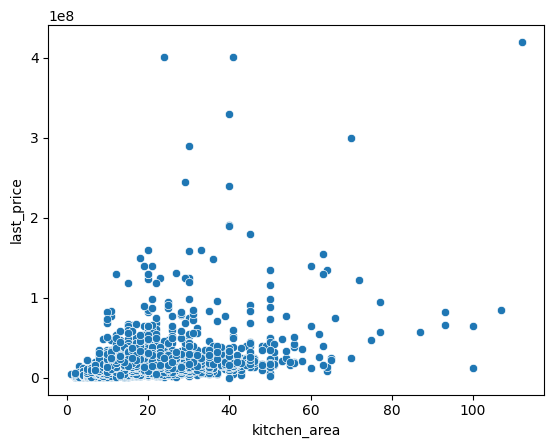

In [108]:
sns.scatterplot(data=df1, x='kitchen_area', y='last_price');

In [109]:
display(
data['last_price'].corr(data['living_area']),
data['last_price'].corr(data['kitchen_area'])
)

0.5834424727713045

0.47549244089836384

Зависимость цены от жилой площади и площади кухни показывает слабую корреляцию.

*Зависимость от количества комнат*

In [110]:
df3 = data.groupby('rooms')['last_price'].agg(['mean','count'])
df3.reset_index(inplace=True)
df3

,rooms,mean,count
0,0,3.344493e+06,194
1,1,3.833818e+06,8002
2,2,5.587947e+06,7893
3,3,8.174764e+06,5779
4,4,1.341792e+07,1172
5,5,2.379830e+07,325
6,6,3.188004e+07,104
7,7,5.147007e+07,59
8,8,5.022417e+07,12
9,9,3.415236e+07,8


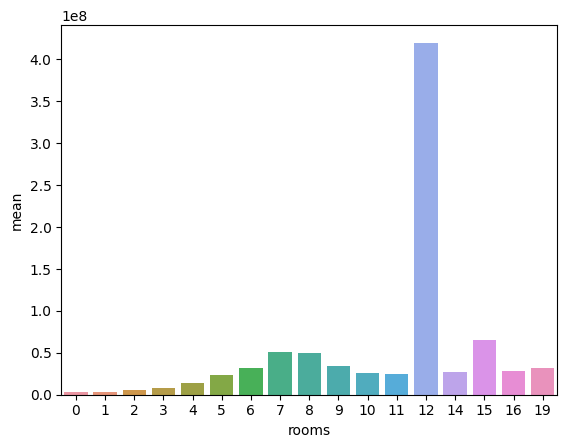

In [111]:
sns.barplot(data=df3, x='rooms', y='mean');

In [112]:
df4 = df3[:6]

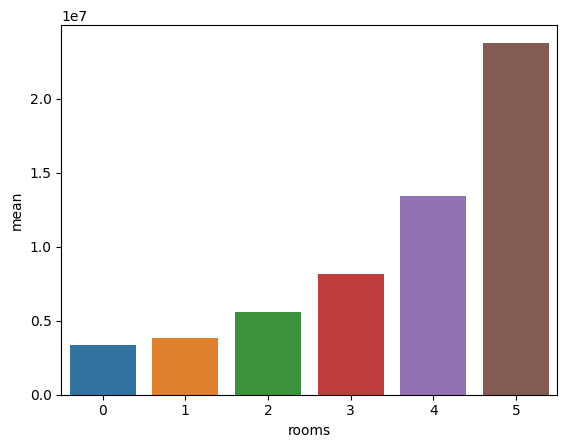

In [113]:
sns.barplot(data=df3[:6], x='rooms', y='mean');

In [114]:
display(
df4['rooms'].corr(df4['mean']))

0.9119697773427605

Вывод: цена показывает очень высокую корреляцию в пределах при количестве комнат до 5. Квартир с более, чем 5 комнат меньше, чем тех, где комнат меньше 5. Их лучше исключить из выборки или перенести в категорию "больше 5"

<div class="alert-danger">
<b>Комментарий ревьюера ❌</b>

По категориальным признакам (таким как этажность, количество комнат, день, месяц и год размещения) диаграмма рассеяния не очень показательна, имеет смысл построить на графиках и сравнить медианные цены.</div>

<div class="alert-info">
<b>Комментарий студента</b>

Там где я строил диаграмму рассеяния по столбчатой диаграмме сложно было что-то понять. Либо я ее не правильно построил. 
Прошу предоставить пример подтверждающий утверждение с объяснением. 
Там где столбчатая диаграмма был уместна она конечно же предпочтительнее диаграммы рассеяния.
    
</div>

*высота потолка*

In [115]:
df5 = data.groupby('ceiling_ctgry')['last_price'].agg(['mean','count'])
df5.reset_index(inplace=True)
df5

,ceiling_ctgry,mean,count
0,"(0.0, 2.5]",4.070226e+06,3595
1,"(2.5, 2.65]",5.611935e+06,13078
2,"(2.65, 2.75]",6.101074e+06,2671
3,"(2.75, 3.0]",9.347613e+06,2711
4,"(3.0, 4.0]",1.578343e+07,1452
5,"(4.0, inf]",2.906287e+07,52


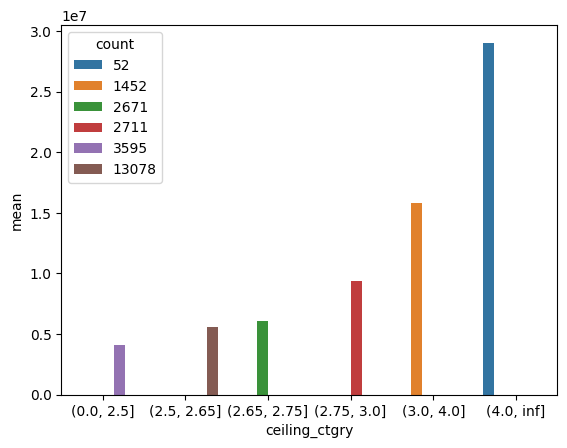

In [116]:
sns.barplot(data=df5, x='ceiling_ctgry', y='mean', hue='count');

Вывод: из графика видно, что цена квартиры растет в зависимости от высоты потолка.

*тип этажа*

In [156]:
df6 = data.groupby('floor_ctgry')['last_price'].agg(['mean','count', 'median'])
df6.reset_index(inplace=True)
df6

,floor_ctgry,mean,count,median
0,другой,6.674920e+06,17321,4850000
1,первый,4.803740e+06,2908,3900000
2,последний,7.359138e+06,3330,4300000


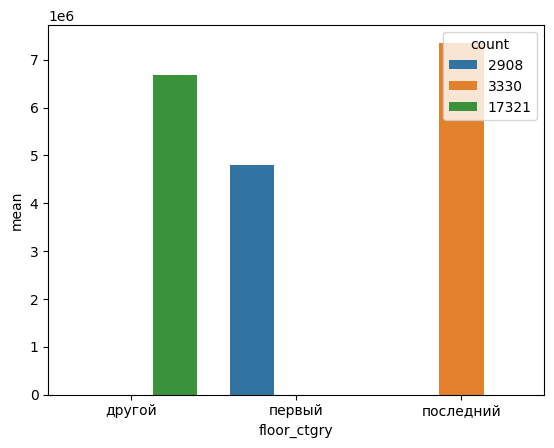

In [160]:
sns.barplot(data=df6, x='floor_ctgry', y='mean', hue='count');

Вывод: из графика видно, что средняя цена первого этажа меньше средней цены любого другого этажа. В то же время цена последнего этажа как правило выше остальных.

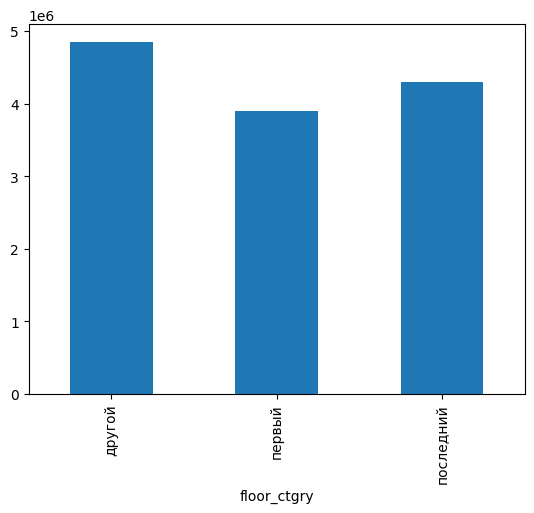

In [119]:
#Код ревьюера
data.groupby('floor_ctgry')['last_price'].median()\
    .plot(kind = 'bar');

<div class="alert-warning">
<b>Комментарий ревьюера ⚠️</b>

У меня получается, что дороже всего стоит не первый и не последний этаж. 👆</div>

<div class="alert-info">
<b>Комментарий студента</b>

Я строил график по среднему, а у тебя медиана.
</div>

*количество этажей*

In [120]:
df7 = data.groupby('floors_total')['last_price'].agg(['mean','count'])
df7.reset_index(inplace=True)
df7.head()

,floors_total,mean,count
0,1,2.788200e+06,25
1,2,3.598849e+06,380
2,3,5.914157e+06,667
3,4,8.058818e+06,1193
4,5,5.193177e+06,5775


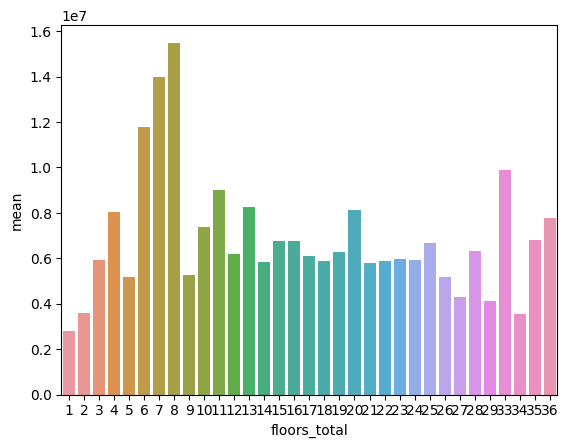

In [121]:
sns.barplot(data=df7, x='floors_total', y='mean');

In [122]:
df7['floors_total'].corr(df7['mean'])

-0.18582819369893205

Вывод: связь между ценой и количеством этажей не прослеживается.

In [123]:
data['floors_total'].corr(data['last_price'])

-0.006604087470861147

*дата публикации*

In [124]:
df8 = data.pivot_table(values='last_price', index='exposition_start_month', columns='exposition_start_year', aggfunc='mean')
df8

exposition_start_year,2014,2015,2016,2017,2018,2019
exposition_start_month,,,,,,
1,NaN,1.582755e+07,7.312000e+06,6.581929e+06,5.747096e+06,6.371066e+06
2,NaN,7.923008e+06,8.129425e+06,6.526407e+06,5.731290e+06,7.235721e+06
3,NaN,7.179588e+06,7.057036e+06,6.161142e+06,5.549863e+06,6.975384e+06
4,NaN,6.457273e+06,6.175427e+06,7.590612e+06,6.718743e+06,6.446387e+06
5,NaN,6.402189e+06,6.550179e+06,6.405751e+06,6.974866e+06,7.825606e+06
6,NaN,9.117032e+06,7.281116e+06,5.652759e+06,5.830707e+06,NaN
7,NaN,1.010578e+07,5.741500e+06,7.354577e+06,5.933923e+06,NaN
8,NaN,1.189243e+07,5.109841e+06,6.145118e+06,6.049981e+06,NaN
9,NaN,8.845384e+06,7.368346e+06,7.291539e+06,5.938453e+06,NaN


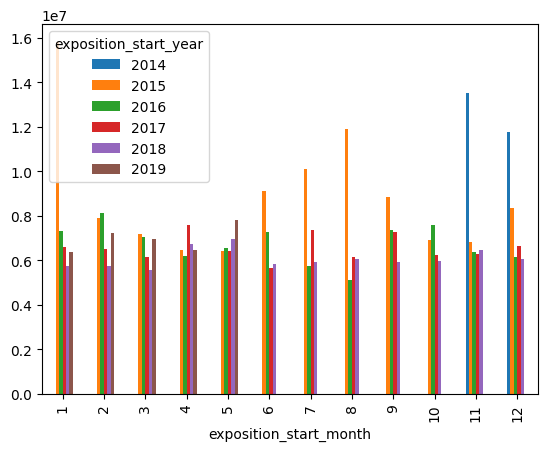

In [150]:
df8.plot(kind='bar');

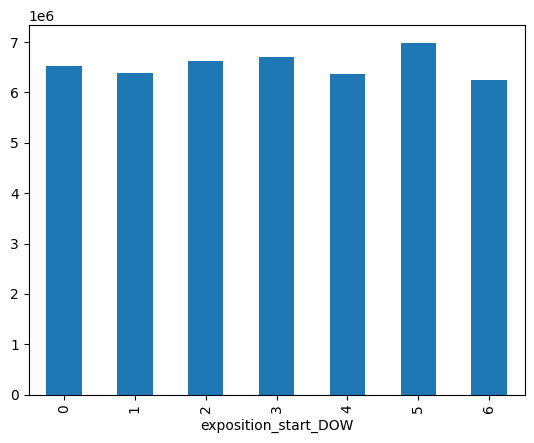

In [154]:
data.groupby('exposition_start_DOW')['last_price'].agg('mean').plot(kind='bar');

In [162]:
data.groupby('exposition_start_DOW')['last_price'].agg('mean') 

exposition_start_DOW
0    6.520435e+06
1    6.389831e+06
2    6.630406e+06
3    6.707446e+06
4    6.359905e+06
5    6.986165e+06
6    6.242137e+06
Name: last_price, dtype: float64

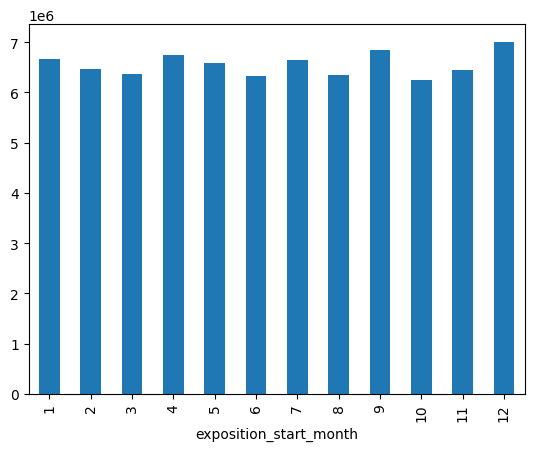

In [127]:
data.groupby('exposition_start_month')['last_price'].agg('mean').plot(kind='bar');

In [161]:
data.groupby('exposition_start_month')['last_price'].agg('mean') 

exposition_start_month
1     6.664171e+06
2     6.463941e+06
3     6.359922e+06
4     6.743395e+06
5     6.591913e+06
6     6.318354e+06
7     6.639479e+06
8     6.348572e+06
9     6.839898e+06
10    6.237903e+06
11    6.449083e+06
12    7.005343e+06
Name: last_price, dtype: float64

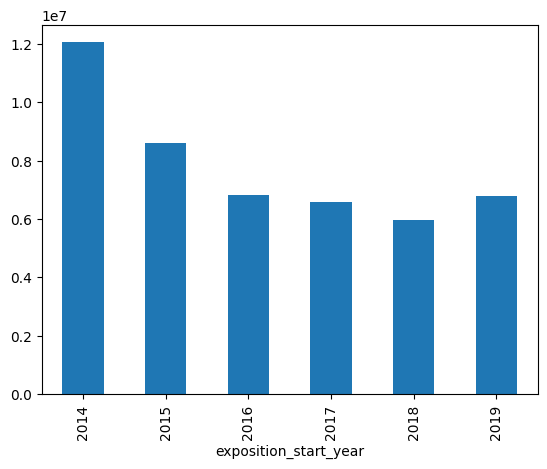

In [128]:
data.groupby('exposition_start_year')['last_price'].agg('mean').plot(kind='bar');

Вывод: Наибольшего значения средняя цена достигала в конце 2014(старт выборки) - наяале 2015 гг. В субботу средняя цена выше, чем в остальные дни. Средняя цена выше в декабре.

<div class="alert-warning">
<b>Комментарий ревьюера ⚠️</b>

Тем не менее, по графикам видно, что средние цены немного различаются в зависимости от дня недели и месяца размещения объявления. Нужно сформулировать эту зависимость.</div>

<div class="alert-info">
<b>Комментарий студента</b>

Сделано.
    
    
</div>

**"Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name."**

In [129]:
data['price_sqm'] = data['last_price'] / data['total_area']

In [140]:
df9 = data.groupby('locality_name')['price_sqm'].agg(['mean', 'count']).sort_values(by='count', ascending=False)
df9 = df9[:10]

In [142]:
df9

,mean,count
locality_name,,
Санкт-Петербург,115369.353982,15647
Мурино,86677.958763,586
Кудрово,95814.588746,470
посёлок Шушары,78943.474460,439
Всеволожск,68985.235455,398
Пушкин,103611.362825,369
Колпино,75735.589833,338
посёлок Парголово,90675.627757,327
Гатчина,69045.519030,307


In [131]:
df9[df9['mean'] == df9['mean'].min()].round(0)

,mean,count
locality_name,,
Выборг,58296.0,237


In [132]:
df9[df9['mean'] == df9['mean'].max()].round(0)

,mean,count
locality_name,,
Санкт-Петербург,115369.0,15647


Минимальная стоимость кв метра в Выборге, максимальная в Санкт-Петербурге.

<div class="alert-warning">
<b>Комментарий ревьюера ⚠️</b>

Правильно, но давай выведем общую сводную таблицу для 10 населённых пунктов с наибольшим числом объявлений </div>

**Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.**

In [133]:
df10 = data.query('locality_name == "Санкт-Петербург"').reset_index(drop=True)

In [134]:
df11 = df10.pivot_table(values='last_price', index='cityCenters_nearest_km', aggfunc=['mean','count']).reset_index()
df11['mean'] = df11['mean'] / 10 ** 6 #переводим в миллионы
df11.head()

,cityCenters_nearest_km,mean,count
,,last_price,last_price
0,0.0,31.449116,27
1,1.0,21.206721,192
2,2.0,17.788320,310
3,3.0,11.137395,348
4,4.0,13.304280,688


In [135]:
df11.columns=('cityCenters_nearest_km', 'mean', 'count')#убираем лишний уровень из названий столбцов

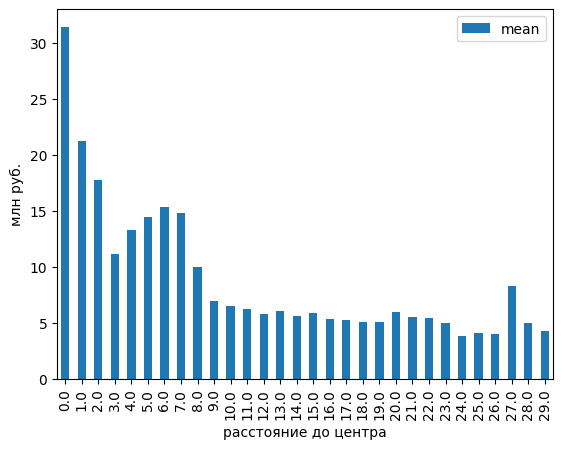

In [136]:
df11.plot(x='cityCenters_nearest_km', y='mean', kind='bar', ylabel='млн руб.', xlabel='расстояние до центра');

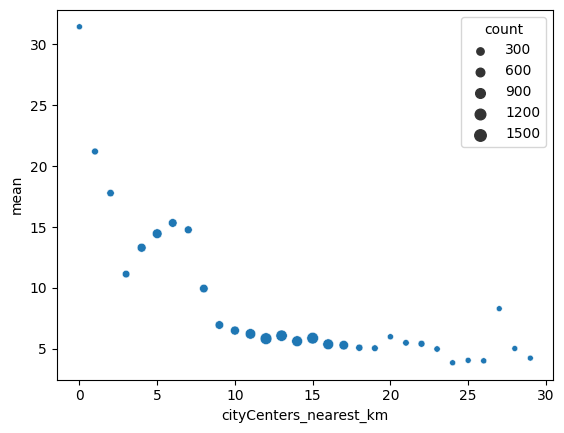

In [137]:
sns.scatterplot(data=df11, x='cityCenters_nearest_km', y='mean', size='count');

In [138]:
df11['cityCenters_nearest_km'].corr(df11['mean'])

-0.7610213412955605

Вывод: цена имеет выраженную зависимость от расстояния до центра города. При этом присуцвуют выбивающиеся зоны в котрых цена может возрастать.

<div class="alert-warning">
<b>Комментарий ревьюера ⚠️</b>

Какую границу центра города можно определить по графикам?</div>

<div class="alert-info">
<b>Комментарий студента</b>

Полагаю, что 3км. Но не понятно, почему стоимость с 4 по 9 км выше чем на 3.
    
    
</div>

## Вывод

**Введение**

Мы рассмотрели датасет объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. 
В ходе рассмотрения было выполнено несколько этапов: обзор данных, предобработка данных, обработка данных, исследовательский анализ данных.

**Обработка данных**

В ходе обзора данных были выявлены проблеммные места датасета: отсутствующие значения, неверные типы, выбивающиеся крайние значения. 

В ходе предобработки данных были произведены следующие преобразования:
- столбец isapartment был приведен к типу bool путем замены значений 'nan' на 0;
- в столбеце ceiling_height значения потолков высотой более 10.3 м были поделены на 10. значения 'nan' были заменены медианой; 
- был добавлен столбец 'ceiling_ctgry'  со следующими интервалами 0, 2.5, 2.65, 2.75, 3, 4, np.inf;
- в столбце floors_total были удалены значения более 36. их рассматриваем как выбросы;
- в столбце airports_nearest значения 0 были заменены на 'nan'. поскольку 0 явно неккоректое значение;
- в столбце balcony значения NaN были заменены на 0
- в столбце locality_name была произведена обработка неявных дубликатов. в названиях населенных пунктов можно было встретить значения 'поселок' и 'посёлок'. значения были привдены к значчению 'посёлок'. остальные дубликаты были отфильтрованы в ручную;
- столбцах в ponds_around3000 и parks_around3000 значения NaN были заменены на 0;
- столбец first_day_exposition был приведен к типу datetime для удобства работы;
- в столбце living_area пропуски заменнены на ближайшее значение;
- в столбце kitchen_area пропуски заменнены на ближайшее значение;


В ходе обработки данных были добавлены столбцы:
- price_for_sqr - цена одного квадратного метра; 
- exposition_start_DOW - день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- exposition_start_month - месяц публикации объявления;
- xposition_start_year - год публикации объявления;
- cityCenters_nearest_km - расстояние до центра города в километрах;
- floor_ctgry - тип этажа квартиры (значения — «первый», «последний», «другой»);

**Исследование**
Был произведен анализ времени продажи квартир и получены следующие выводы:
В среднем квартира продается за 180 дней. При этом половина всех продаж происходит в первые 95 дней. Быстрой продажей можно считать, если квартира была прожана за первые 45 дней. Если же объявление висит более 230 дней продажу можно считать долгой.

Были исследованы факторы влияющие на общую стоимость объекта: 
1. Общая площадь. 
   Зависимость от площади показывают среднюю корреляцию. Если отсечь выбросы и оставить данные в квадрате цена < 20_000_000 и площадь < 150 корреляция будет немного выше. В целом для квартир с одинаковой площадью цена может варьироваться в широких пределах. Это показывает, что общая площадь оказывает существенное, но не окончательное влияние на стоимость квартиры.
   
2. Зависимость от количества комнат. 
   Цена показывает очень высокую корреляцию при количестве комнат до 5. Это говорит о том, что данный параметр хорошо подходит для анализа стоимости квартир. При этом при количестве комнат более 5, зависимосить не прослеживается.

3. Высота потолка
    Цена показывает рост при возрастании высоты поталка. При этом цена начинает расти с большей скоростью при высоте потолка более 2,75 м.

4. Тип этажа
   Средняя цена первого этажа меньше средней цены любого другого этажа. В то же время цена последнего этажа как правило выше остальных.

5. Количество этажей. 
    Не удалось проследить связь между ценой и количеством этажей.

6. Дата публикации.
    Наибольшего значения средняя цена достигала в конце 2014(старт выборки) - наяале 2015 гг. В субботу средняя цена выше, чем в остальные дни. Средняя цена выше в декабре.

Были проанализированы среднии цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Было обнаружено, что минимальная стоимость кв метра в Выборге, максимальная в Санкт-Петербурге.

Была проанализировнана средняя стоимость квартир в зависимости от расстояния до центра города. Средняя стоимость показывает устойчивую тенденцию к снижению при удалении от центра города. При этом на некоторых участках средняя стоимость может возрастать по отношению к предыдущим участвкам.






<div class="alert-success">
<b>Комментарий ревьюера ✔️</b>

Правильно, что написал подробный общий вывод с результатами, полученными во всех шагах работы. Можно было бы вывод расширить рекомендацией сервису размещения объявлений, как улучшить сбор данных.

Отдельные пункты вывода нужно будет поправить, после доработки.</div>

<div style="border:solid blue 3px; padding: 20px">
<b>Общий комментарий ревьюера:</b>

Ты проделал большую работу, но нужно кое-что поправить чтобы я ее принял.
    
Есть несколько критических замечаний:
- выводу гистограмм всех столбцов
- по заполнению пропусков
- по изучению параметров объектов
- по влиянию категориальных признаков на цену
    
Также, нужно будет отработать желтые комментарии.
    
Буду ждать твой доработанный проект. ⌛️</div>